# PDF and CDF w/ Carbon Tax

In [6]:
import pandas as pd

# Load data from your Excel file and specific sheet
file_path = '/Users/jbpcadiz/Library/CloudStorage/OneDrive-UniversityofCalifornia,Davis/Distribution Paper/Transporting_Hydrogen_Via_Hydrogen/Final_MC_GHG_Hydrogen.xlsm'  # Replace with your actual file path
sheet_name_100_km = 'Base Case 100 km'  # Replace with your sheet name
sheet_name_250_km = 'Base Case 250 km'  # Replace with your sheet name
df_100_km = pd.read_excel(file_path, sheet_name=sheet_name_100_km, usecols='E:N', skiprows=18, nrows=36)
df_250_km = pd.read_excel(file_path, sheet_name=sheet_name_250_km, usecols='E:N', skiprows=18, nrows=36)

# Filter columns as needed and drop unnamed columns
df_100_km = df_100_km.loc[:, ~df_100_km.columns.str.contains('Unnamed', na=False)]
df_250_km = df_250_km.loc[:, ~df_250_km.columns.str.contains('Unnamed', na=False)]

# Create dictionaries for each demand level
low_demand_values_100_km = {}
medium_demand_values_100_km = {}
high_demand_values_100_km = {}

low_demand_values_250_km = {}
medium_demand_values_250_km = {}
high_demand_values_250_km = {}

# Map delivery types to standardized names (e.g., matching the names in your provided picture)
delivery_type_map = {
    'Gas': 'Gas Trucks',
    'Liquid': 'Liquid Trucks',
    'Pipeline': 'Pipelines'
}

# Iterate over the DataFrame to build dictionaries
for _, row in df_100_km.iterrows():
    city = row['City']
    demand = row['Demand']
    delivery_type = row['Delivery Type']
    total_cost = row['Total Cost']

    # Map the delivery type to standardized names
    delivery_type = delivery_type_map.get(delivery_type, delivery_type)

    # Format the key as "City Delivery_Type"
    key = f"{city} {delivery_type}"

    # Append to the respective dictionary based on demand level
    if demand == 'Low':
        low_demand_values_100_km[key] = total_cost
    elif demand == 'Medium':
        medium_demand_values_100_km[key] = total_cost
    elif demand == 'High':
        high_demand_values_100_km[key] = total_cost

# Iterate over the DataFrame to build dictionaries
for _, row in df_250_km.iterrows():
    city = row['City']
    demand = row['Demand']
    delivery_type = row['Delivery Type']
    total_cost = row['Total Cost']

    # Map the delivery type to standardized names
    delivery_type = delivery_type_map.get(delivery_type, delivery_type)

    # Format the key as "City Delivery_Type"
    key = f"{city} {delivery_type}"

    # Append to the respective dictionary based on demand level
    if demand == 'Low':
        low_demand_values_250_km[key] = total_cost
    elif demand == 'Medium':
        medium_demand_values_250_km[key] = total_cost
    elif demand == 'High':
        high_demand_values_250_km[key] = total_cost


# Print the dictionaries
print("Low Demand Base Case Values 100 km:")
print(low_demand_values_100_km)

print("\nMedium Demand Base Case Values 100 km:")
print(medium_demand_values_100_km)

print("\nHigh Demand Base Case Values 100 km:")
print(high_demand_values_100_km)

# Print the dictionaries
print("Low Demand Base Case Values 250 km:")
print(low_demand_values_250_km)

print("\nMedium Demand Base Case Values 250 km:")
print(medium_demand_values_250_km)

print("\nHigh Demand Base Case Values 250 km:")
print(high_demand_values_250_km)


Low Demand Base Case Values 100 km:
{'New Haven Gas Trucks': 5.0548651614617235, 'New Haven Liquid Trucks': 9.146498189610497, 'New Haven Pipe': 35.81119694050035, 'Fresno Gas Trucks': 5.066748517788358, 'Fresno Liquid Trucks': 9.161271752602145, 'Fresno Pipe': 32.56828667075528, 'Atlanta Gas Trucks': 4.7518172737726925, 'Atlanta Liquid Trucks': 7.219707331908647, 'Atlanta Pipe': 14.55370484147958, 'Miami Gas Trucks': 4.5850435143112005, 'Miami Liquid Trucks': 7.177088885619102, 'Miami Pipe': 11.583675206089808}

Medium Demand Base Case Values 100 km:
{'New Haven Gas Trucks': 4.031133838565903, 'New Haven Liquid Trucks': 7.009114010422916, 'New Haven Pipe': 7.26195820355473, 'Fresno Gas Trucks': 3.9779524048471666, 'Fresno Liquid Trucks': 7.013387573414564, 'Fresno Pipe': 6.543194145354161, 'Atlanta Gas Trucks': 4.2573974914042365, 'Atlanta Liquid Trucks': 5.648223152721066, 'Atlanta Pipe': 5.3475853917481135, 'Miami Gas Trucks': 4.086260431632687, 'Miami Liquid Trucks': 5.645004706431

## Low Demand

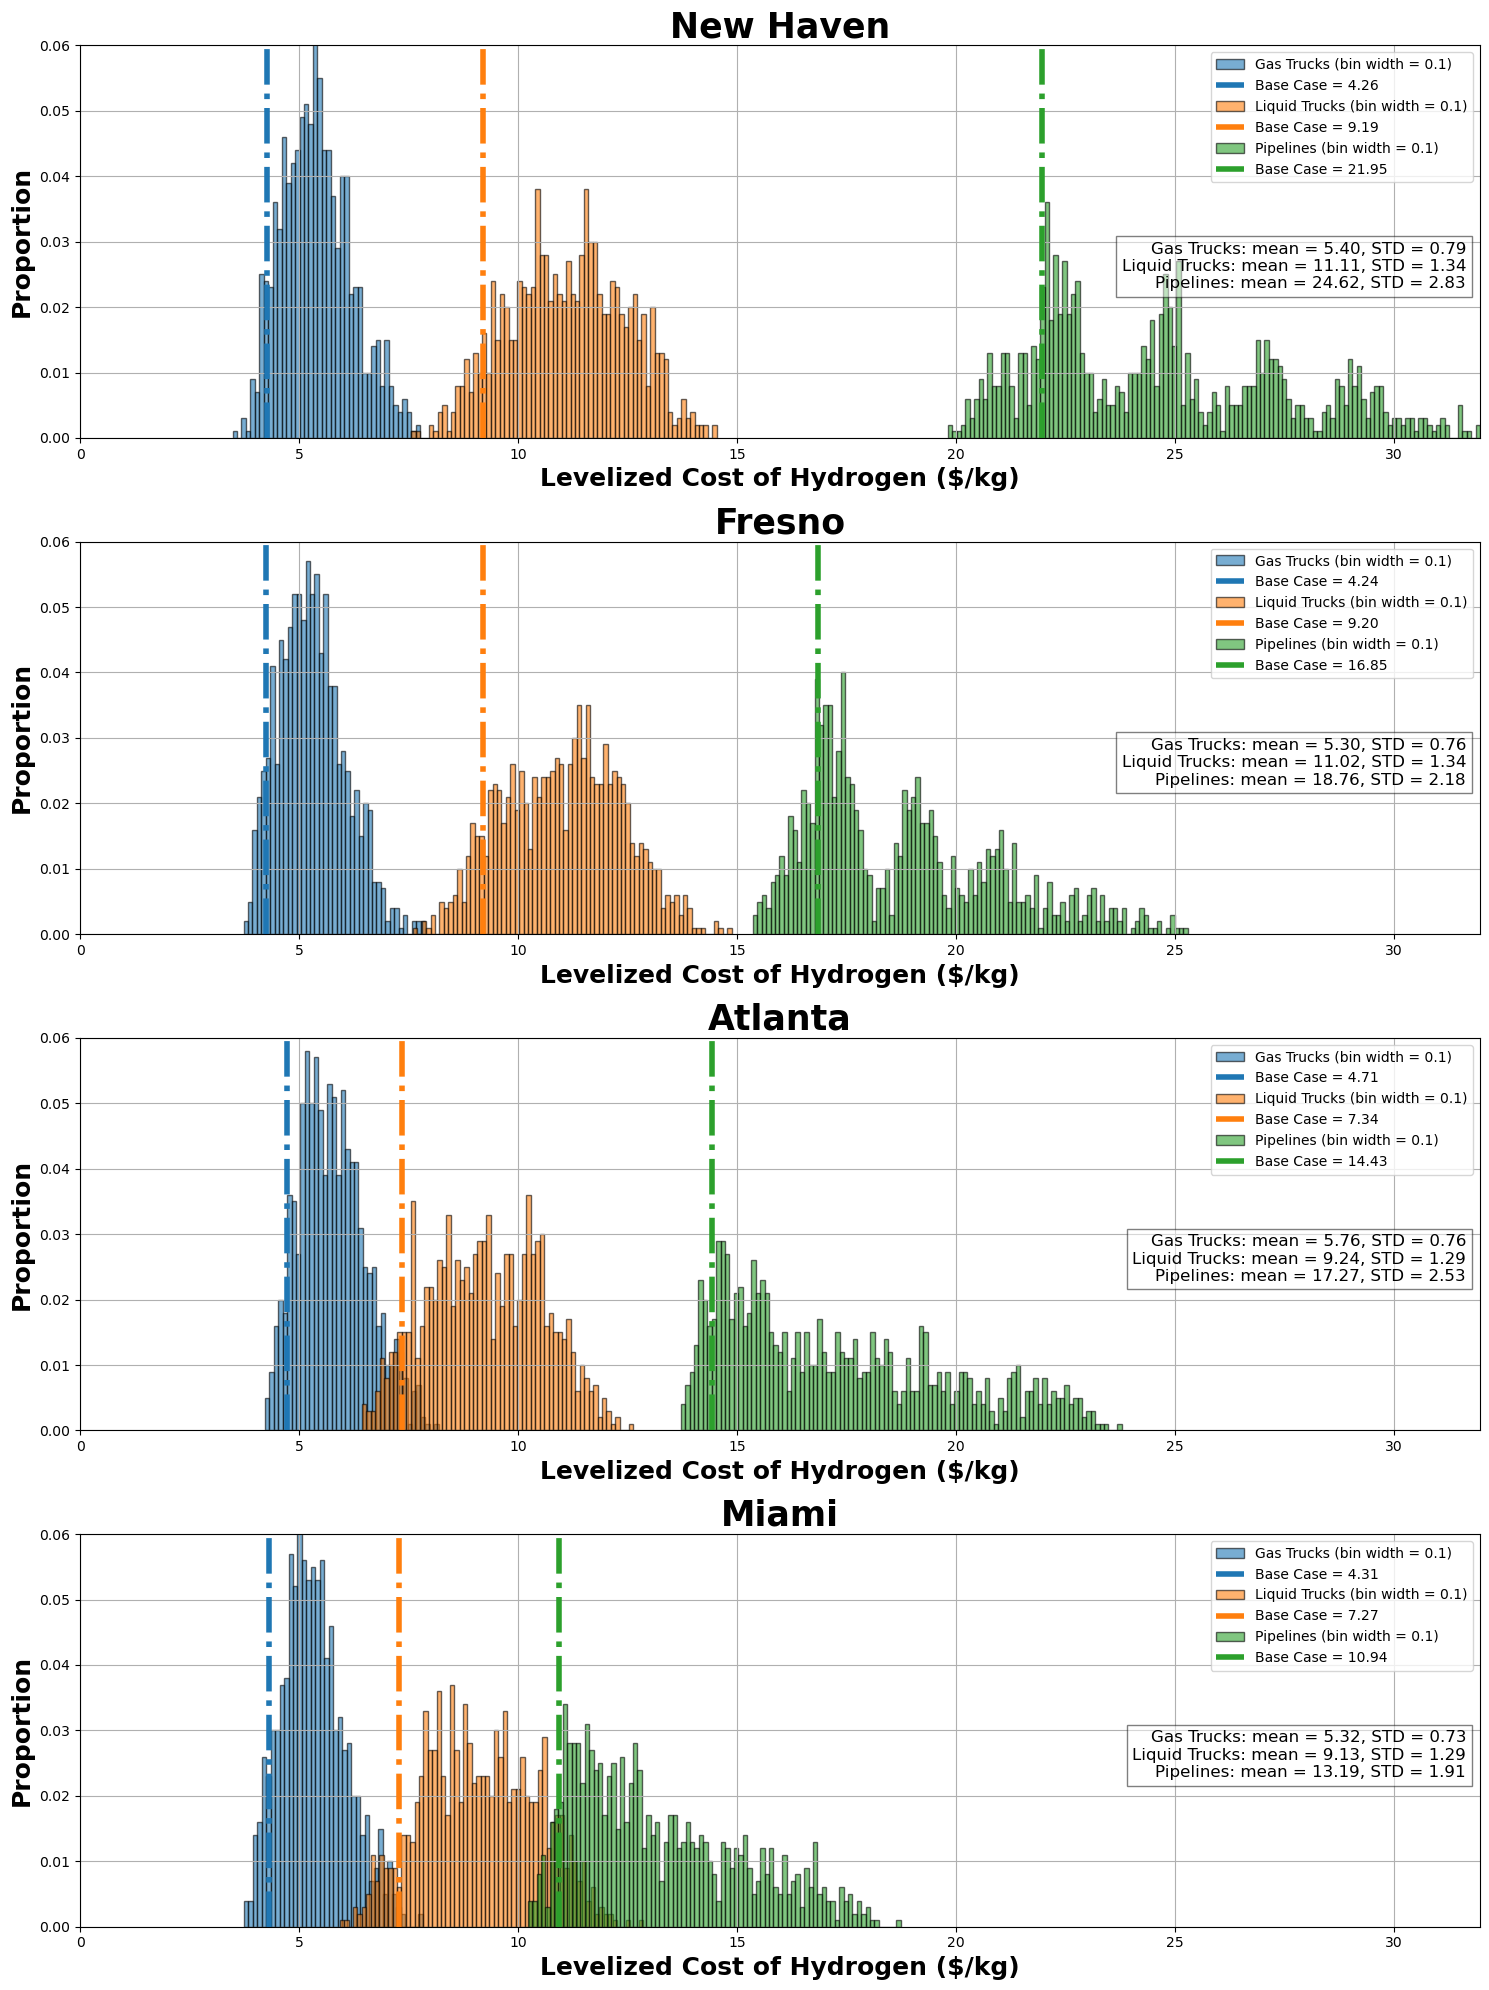

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Path to your CSV file
csv_file_path = 'Costs with Carbon Tax Data/Distribution Paper - Low Demand w_ Carbon Tax.csv'  # Replace with your actual file path

# Reading the CSV file into a DataFrame, skipping the first row and removing unnamed columns
df = pd.read_csv(csv_file_path, skiprows=1)

# Dropping 'Unnamed' columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Assigning new column names
df.columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]

# Desired bin width
bin_width = 0.1

# Base case values for each city and method
base_case_values = low_demand_values

# Function to plot histogram as proportions with specific bin width and include statistics
def plot_histogram_proportions(data, ax, label, bin_width, method_index):
    # Calculate the range of the data
    data_range = data.max() - data.min()
    # Determine the number of bins based on the range and desired bin width
    num_bins = int(data_range / bin_width)

    # Calculate statistics
    mean = data.mean()
    std = data.std()

    # Plot histogram with the calculated number of bins
    counts, bins, patches = ax.hist(data, bins=num_bins, alpha=0.6, label=f"{label} (bin width = {bin_width})", weights=np.ones_like(data) / len(data))
    for patch in patches:
        patch.set_edgecolor('black')  # Add black outline to bars

    # Get the color of the first bar for the base case line (assuming uniform color for all bars)
    if patches:
        line_color = patches[0].get_facecolor()  # Extract color from the first patch
    
        # Plot the base case value as a vertical line with matching color
        if base_case is not None:
            ax.axvline(x=base_case, color=line_color, alpha = 1, linestyle='-.', linewidth=4, label=f'Base Case = {base_case:.2f}')

    # Adjust the y-axis limit for better visual spacing
    ax.set_ylim(0, 0.06)  # Fixing the y-axis to a consistent limit across all subplots

    # Return stats to display under legend
    return mean, std

# Plotting histograms as proportions
fig, axs = plt.subplots(4, 1, figsize=(15, 20))  # Adjust figure size for more space

cities = ["New Haven", "Fresno", "Atlanta", "Miami"]
methods = ["Gas Trucks", "Liquid Trucks", "Pipelines"]

# Create a dictionary to store stats
stats_summary = {}
x_limits = (0, np.max(df['New Haven Pipelines']))

for i, city in enumerate(cities):
    city_stats = []
    axs[i].set_xlim(x_limits)  # Set consistent x-limits for each subplot
    for method_index, method in enumerate(methods):
        column_name = f"{city} {method}"
        if column_name in df.columns:
            base_case = base_case_values.get(column_name, None)
            mean, std = plot_histogram_proportions(df[column_name], axs[i], method, bin_width, method_index)
            city_stats.append(f'{method}: mean = {mean:.2f}, STD = {std:.2f}')
    
    axs[i].set_title(f'{city}', fontsize=25, fontweight='bold')
    axs[i].set_xlabel('Levelized Cost of Hydrogen ($/kg)', fontsize=18, fontweight='bold')
    axs[i].set_ylabel('Proportion', fontsize=18, fontweight='bold')
    axs[i].legend(loc='upper right')
    axs[i].grid(True)
    
    # Display the stats under the legend
    axs[i].text(0.99, 0.5, "\n".join(city_stats), transform=axs[i].transAxes, fontsize=12,
                verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()

# Save the figure as an image file
plt.savefig('Low_Demand_Histograms_w_CT')
plt.show()


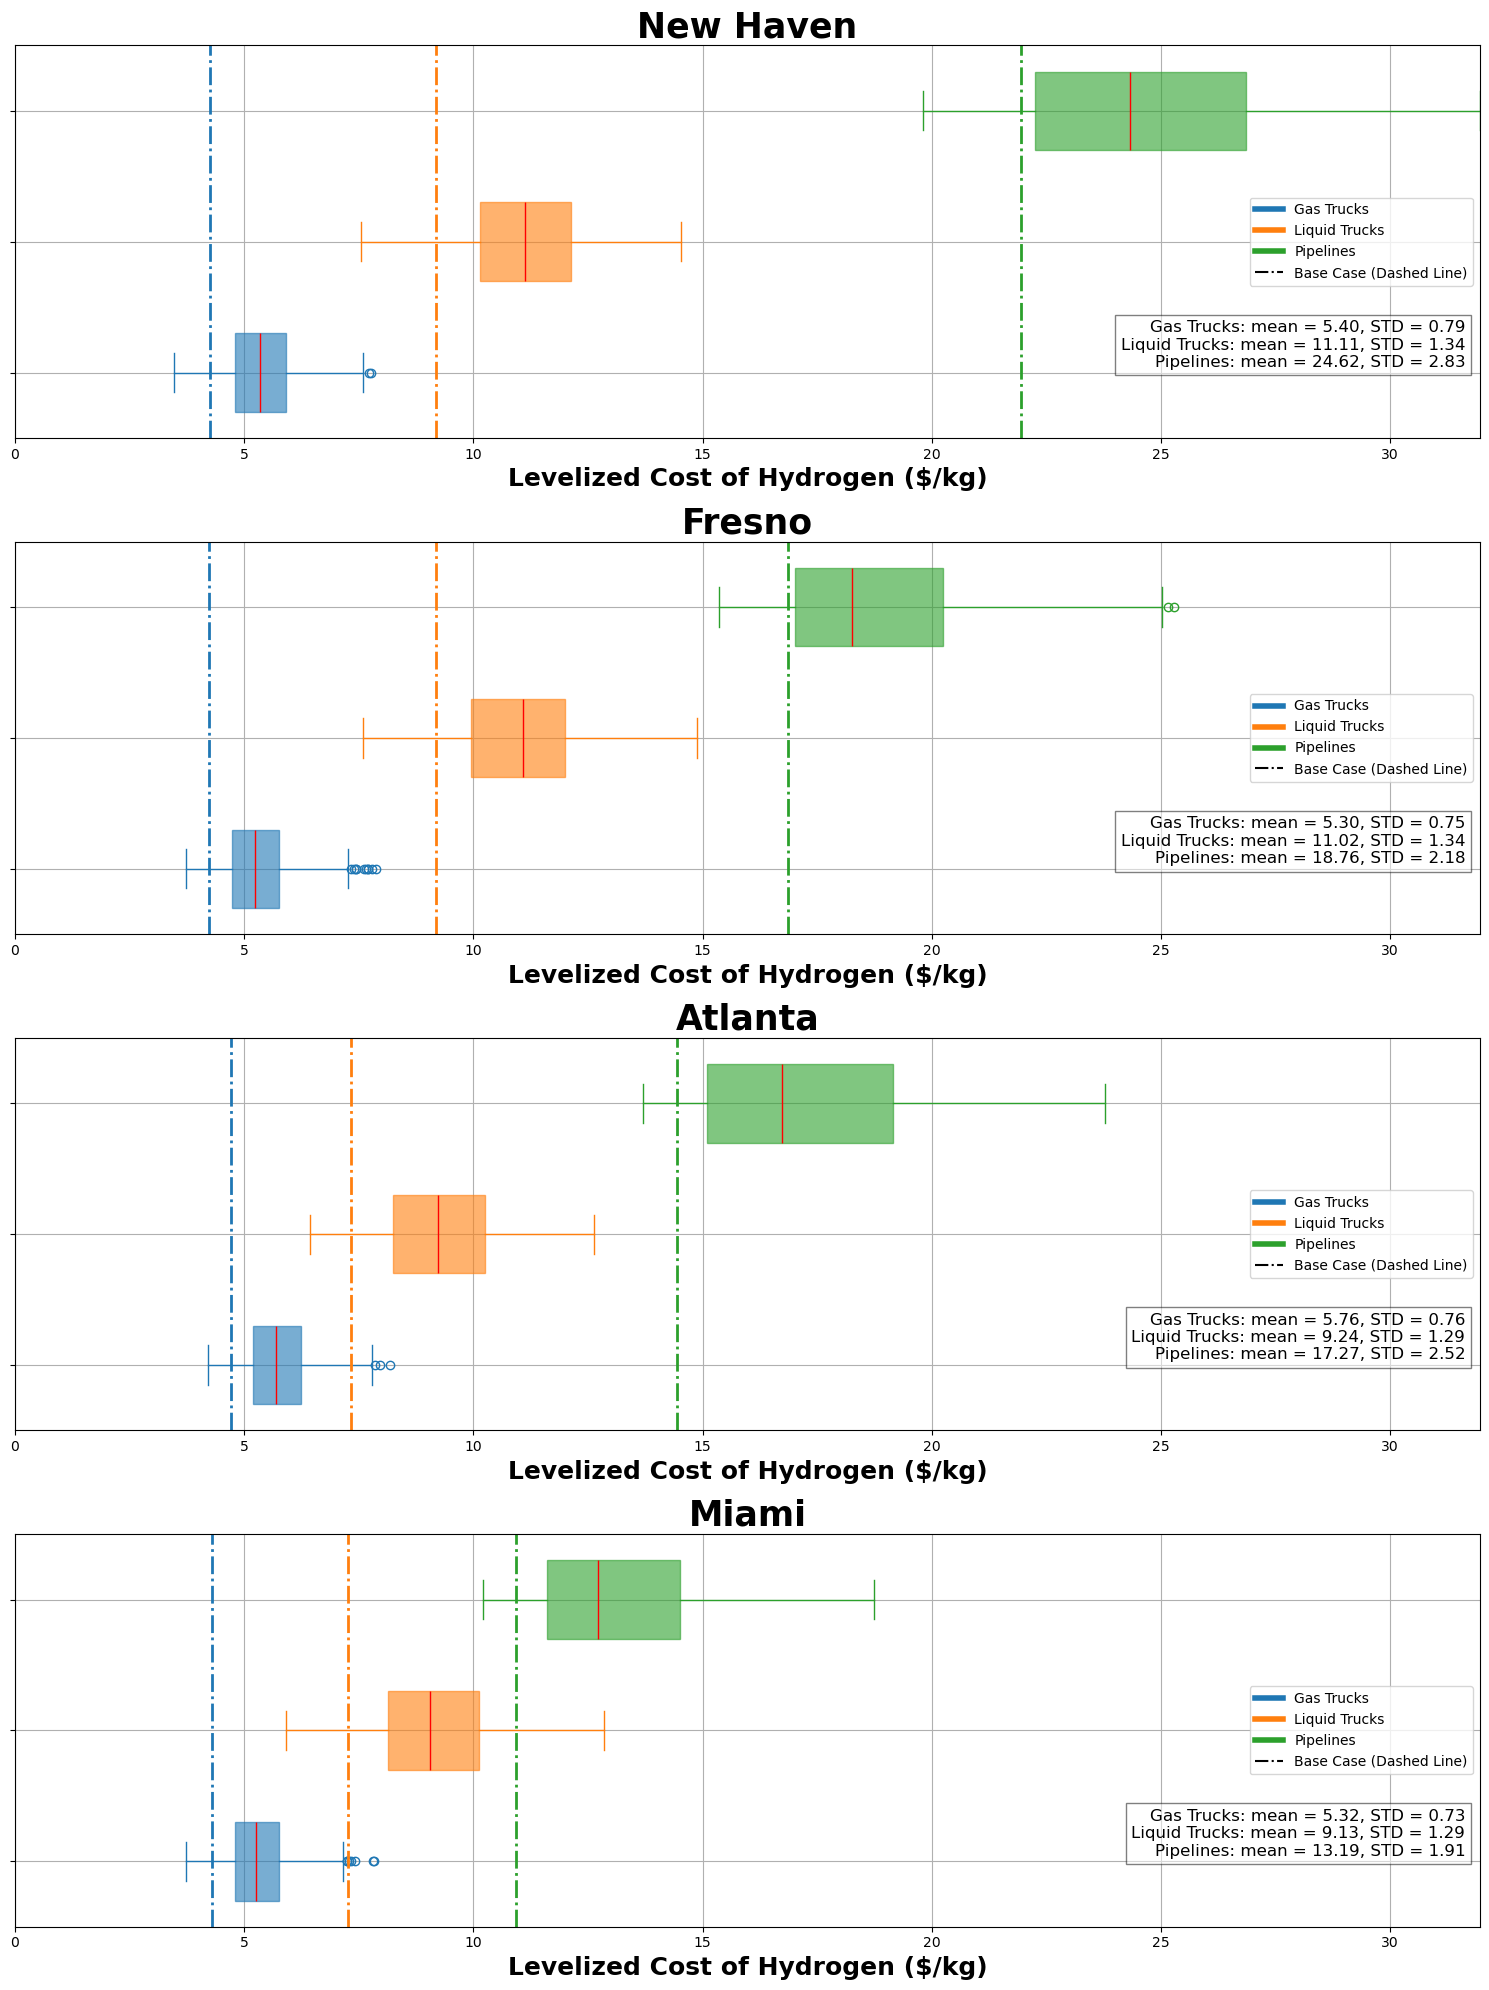

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

# Path to your CSV file (adjust accordingly)
csv_file_path = 'Costs with Carbon Tax Data/Distribution Paper - Low Demand w_ Carbon Tax.csv'  # Replace with your actual file path

# Reading the CSV file into a DataFrame, skipping the first row and removing unnamed columns
df = pd.read_csv(csv_file_path, skiprows=1)

# Dropping 'Unnamed' columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Assigning new column names
df.columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]

# Base case values for each city and method
base_case_values = low_demand_values
# Color scheme to match the previous setup
color_map = {
    "Gas Trucks": "#1f77b4",    # Blue
    "Liquid Trucks": "#ff7f0e",  # Orange
    "Pipelines": "#2ca02c"       # Green
}

# Function to plot boxplots with costs on the x-axis and include base case lines
def plot_boxplot(data, ax, label, color, position, base_case=None):
    # Plot boxplot horizontally with specified color
    ax.boxplot(data, vert=False, positions=[position], widths=0.6, patch_artist=True,
               boxprops=dict(facecolor=color, color=color, alpha = 0.6),
               medianprops=dict(color='red'),
               whiskerprops=dict(color=color),
               capprops=dict(color=color),
               flierprops=dict(markeredgecolor=color))
    
    # Plot the base case value as a vertical line inside the boxplot (with same color)
    if base_case is not None:
        ax.axvline(x=base_case, color=color, linestyle='-.', linewidth=2)  # Use the same color as the boxplot

    # Return stats for display
    mean = np.mean(data)
    std = np.std(data)
    return mean, std

# Plotting boxplots
fig, axs = plt.subplots(4, 1, figsize=(15, 20))  # Adjust figure size for more space

cities = ["New Haven", "Fresno", "Atlanta", "Miami"]
methods = ["Gas Trucks", "Liquid Trucks", "Pipelines"]

# Create a dictionary to store stats
stats_summary = {}

for i, city in enumerate(cities):
    city_stats = []
    axs[i].set_xlim(x_limits)  # Set consistent x-limits for each subplot  # Set consistent x-limits for each subplot
    x_limits = (0, np.max(df['New Haven Pipelines']))
    for method_index, method in enumerate(methods):
        column_name = f"{city} {method}"
        if column_name in df.columns:
            base_case = base_case_values.get(column_name, None)
            data = df[column_name].dropna().values  # Drop NaNs and extract values for the boxplot
            mean, std = plot_boxplot(data, axs[i], method, color_map[method], method_index+1, base_case=base_case)
            city_stats.append(f'{method}: mean = {mean:.2f}, STD = {std:.2f}')
    
    axs[i].set_title(f'{city}', fontsize=25, fontweight='bold')
    axs[i].set_xlabel('Levelized Cost of Hydrogen ($/kg)', fontsize=18, fontweight='bold')

    # Remove y-axis labels
    axs[i].set_yticklabels([])

    # Create custom legend entries for each subplot
    base_case_legend = mlines.Line2D([], [], color='black', linestyle='-.', label='Base Case (Dashed Line)')
    handles = [
        plt.Line2D([0], [0], color=color_map["Gas Trucks"], lw=4, label="Gas Trucks"),
        plt.Line2D([0], [0], color=color_map["Liquid Trucks"], lw=4, label="Liquid Trucks"),
        plt.Line2D([0], [0], color=color_map["Pipelines"], lw=4, label="Pipelines"),
        base_case_legend  # Add the base case line to the legend
    ]
    
    # Add the legend inside the individual plot
    axs[i].legend(handles=handles, loc='center right', fontsize=10)
    axs[i].grid(True)

    # Display the stats in the plot (but no legends for base case lines)
    axs[i].text(0.99, 0.3, "\n".join(city_stats), transform=axs[i].transAxes, fontsize=12,
                verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()

# Save the figure as an image file
plt.savefig('Low_Demand_Boxplots_w_CT')
plt.show()


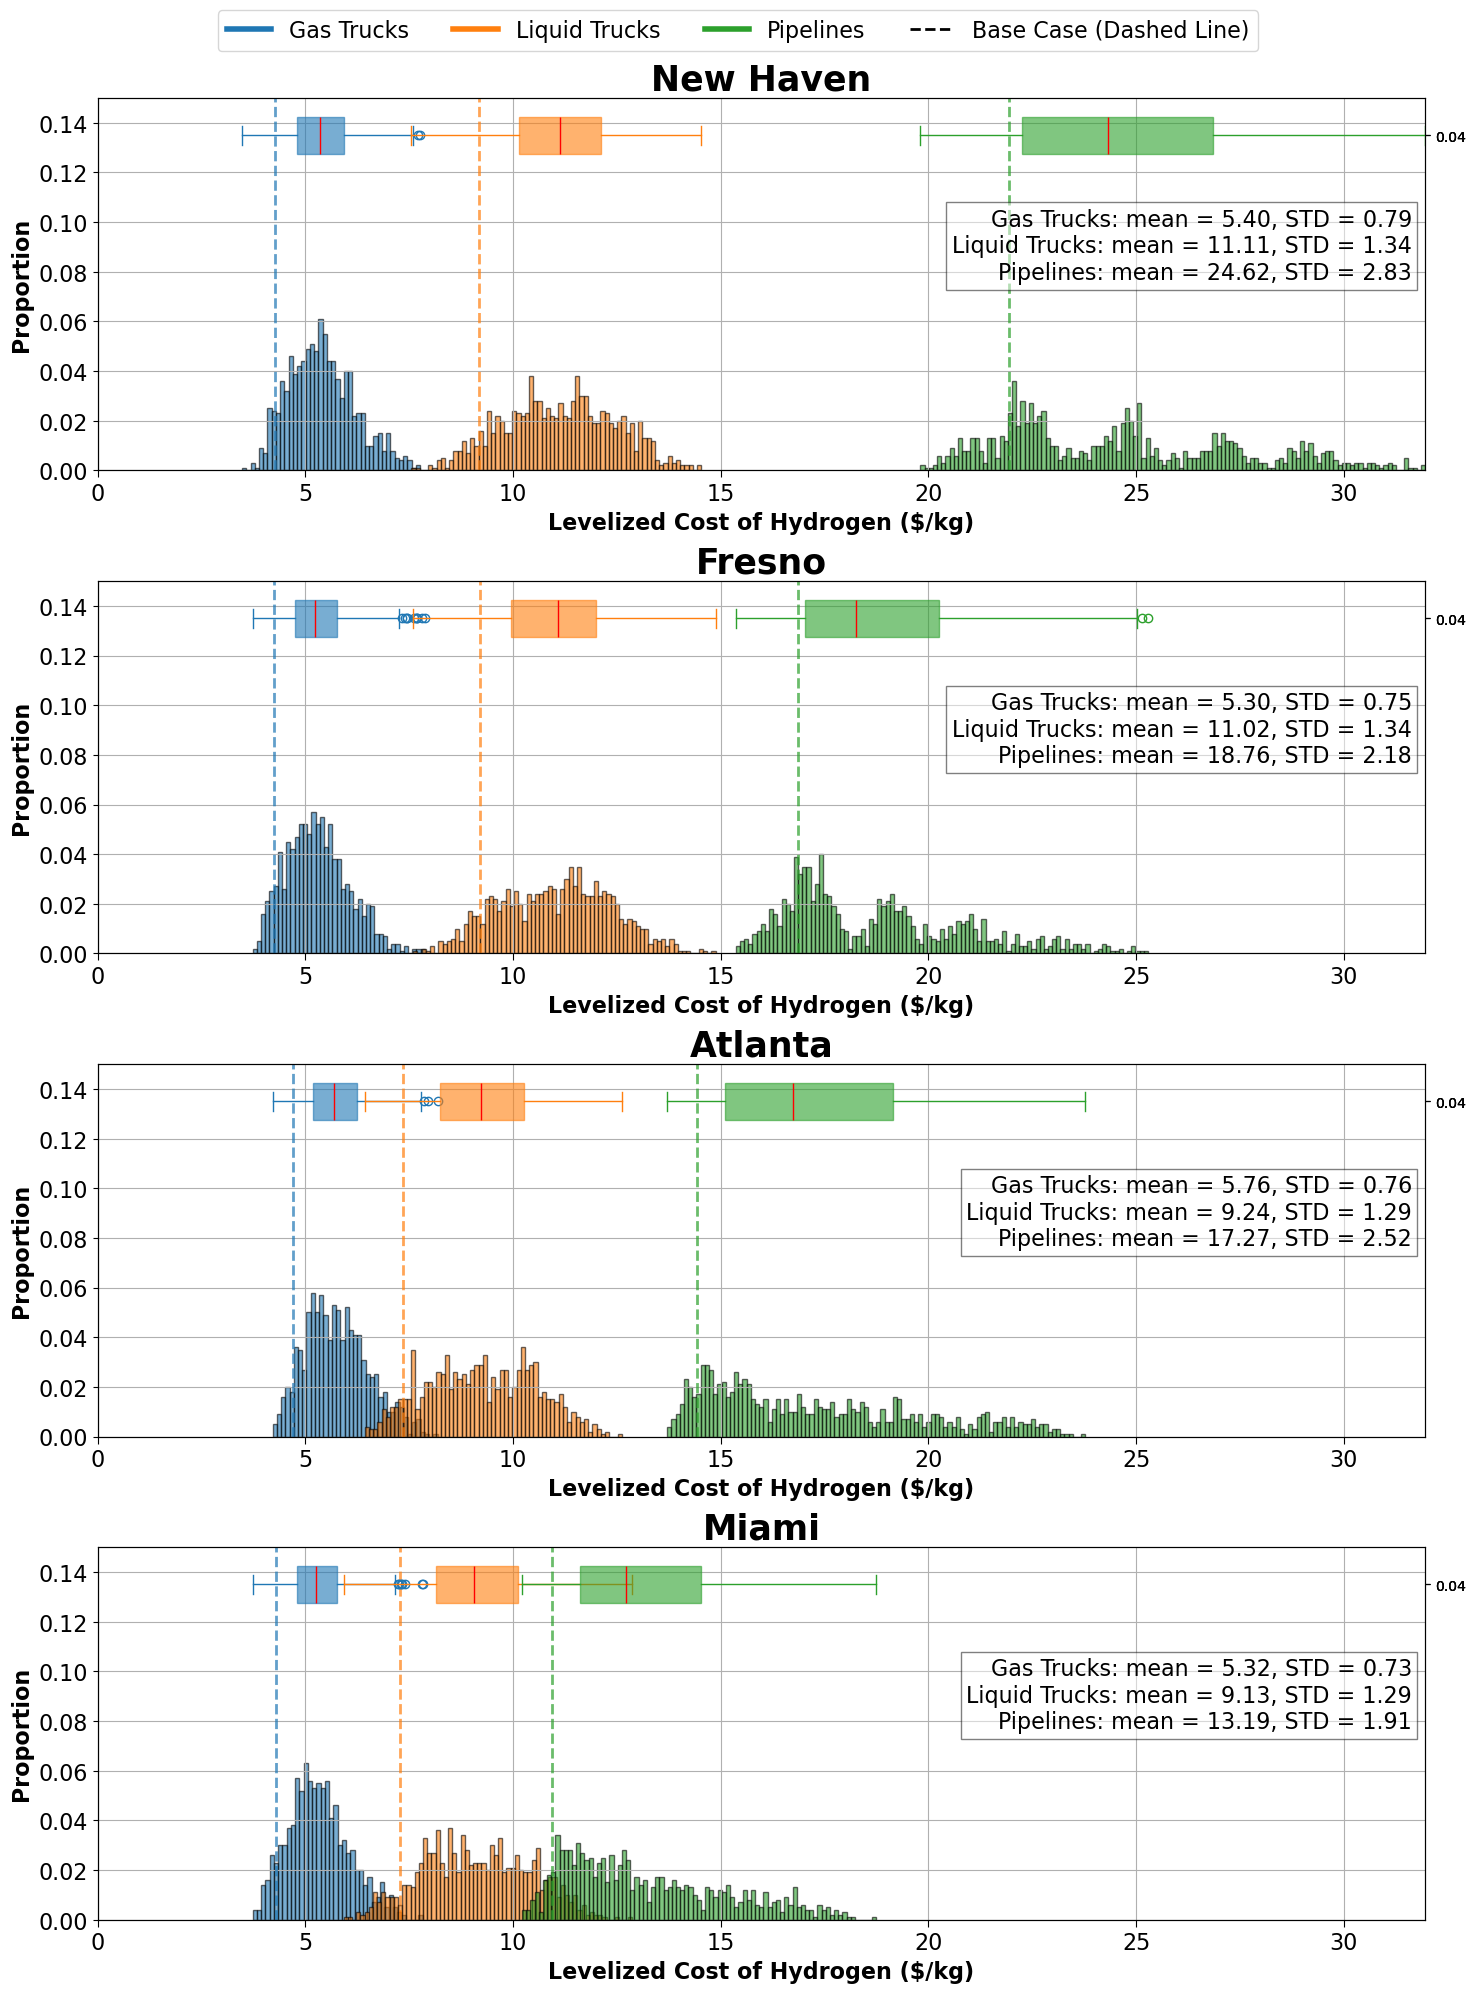

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Path to your CSV file
csv_file_path = 'Costs with Carbon Tax Data/Distribution Paper - Low Demand w_ Carbon Tax.csv'  # Replace with your actual file path

# Reading the CSV file into a DataFrame, skipping the first row and removing unnamed columns
df = pd.read_csv(csv_file_path, skiprows=1)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Dropping 'Unnamed' columns

# Assigning new column names
df.columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]

# Base case values for each city and method
base_case_values = low_demand_values

# Settings
bin_width = 0.1  # Bin width for histograms
color_map = {"Gas Trucks": "#1f77b4", "Liquid Trucks": "#ff7f0e", "Pipelines": "#2ca02c"}
cities = ["New Haven", "Fresno", "Atlanta", "Miami"]
methods = ["Gas Trucks", "Liquid Trucks", "Pipelines"]

# Define consistent x-axis limits and ticks
x_limits = (0, np.max(df['New Haven Pipelines']))
x_ticks = np.arange(0, 36, 5)  # x-ticks from 0 to 35 in increments of 5

# Create figure and subplots for each city
fig, axs = plt.subplots(len(cities), 1, figsize=(15, 20))  # 1 column, 4 rows for each city

for i, city in enumerate(cities):
    ax = axs[i]
    ax.set_title(f'{city}', fontsize=18, fontweight='bold')
    ax.set_ylim(0, 0.15)  # Set y-limits for histogram proportions
    ax.set_xlim(x_limits)  # Set consistent x-limits for each subplot

    # Set x-tick positions and labels explicitly for each subplot
    ax.set_xticks(x_ticks)  # Set x-tick positions
    ax.set_xticklabels([str(int(tick)) for tick in x_ticks], fontsize=16)  # Set x-tick labels
    ax.tick_params(axis='y', which='both', labelsize=16)  # Set label size for y-axis
    ax.tick_params(axis='x', which='both', length=5)  # Set tick length for x-axis

    # Create a secondary y-axis for boxplots without ticks on the right
    ax_box = ax.twinx()
    ax_box.set_ylim(-0.05, 0.05)  # Separate y-limits for boxplots above histograms
    ax_box.set_yticks([])  # Hide y-ticks for boxplot axis
    ax_box.set_xlim(x_limits)  # Ensure consistent x-limits on boxplot axis

    # Prepare a list to collect mean and std information for legend text
    method_stats = []

    # Plot each method (Gas Trucks, Liquid Trucks, Pipelines) for the current city
    for method in methods:
        column_name = f"{city} {method}"
        data = df[column_name].dropna().values  # Drop NaNs and extract values
        base_case = base_case_values.get(column_name)
        color = color_map[method]

        # Plot histogram for each method
        data_range = data.max() - data.min()
        num_bins = int(data_range / bin_width)
        ax.hist(data, bins=num_bins, color=color, alpha=0.6, 
                weights=np.ones_like(data) / len(data), edgecolor='black')
        
        # Overlay boxplot on secondary y-axis with smaller width
        ax_box.boxplot(data, vert=False, widths=0.01,  # Adjust boxplot width to be narrower
                       patch_artist=True, positions=[0.04],  # Position boxplot above histogram
                       boxprops=dict(facecolor=color, color=color, alpha=0.6),
                       medianprops=dict(color='red'), whiskerprops=dict(color=color),
                       capprops=dict(color=color), flierprops=dict(markeredgecolor=color))
        
        # Calculate mean and standard deviation, and format for display
        mean = data.mean()
        std_dev = data.std()
        method_stats.append(f"{method}: mean = {mean:.2f}, STD = {std_dev:.2f}")

        # Add base case as a vertical dashed line
        if base_case is not None:
            ax.axvline(x=base_case, color=color, linestyle='--', linewidth=2, alpha=0.7)

    # Display mean and std information in the lower-right corner of the plot
    ax.text(0.99, 0.5, "\n".join(method_stats), transform=ax.transAxes, fontsize=16,
            verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

    # Set x-axis label for each subplot
    ax.set_title(f'{city}', fontsize=25, fontweight='bold')
    ax.set_xlabel('Levelized Cost of Hydrogen ($/kg)', fontsize=16, fontweight='bold')
    ax.set_ylabel('Proportion', fontsize=16, fontweight='bold')
    ax.grid(True)

# Manually add a custom legend for the entire figure
custom_legend = [
    Line2D([0], [0], color=color_map["Gas Trucks"], lw=4, label="Gas Trucks"),
    Line2D([0], [0], color=color_map["Liquid Trucks"], lw=4, label="Liquid Trucks"),
    Line2D([0], [0], color=color_map["Pipelines"], lw=4, label="Pipelines"),
    Line2D([0], [0], color='black', linestyle='--', linewidth=2, label='Base Case (Dashed Line)')
]
fig.legend(handles=custom_legend, loc='upper center', ncol=4, fontsize=16, frameon=True)

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust top to make room for legend
plt.savefig('Final Plots/Low_Demand_Hist_Box_w_CC.png')
plt.show()

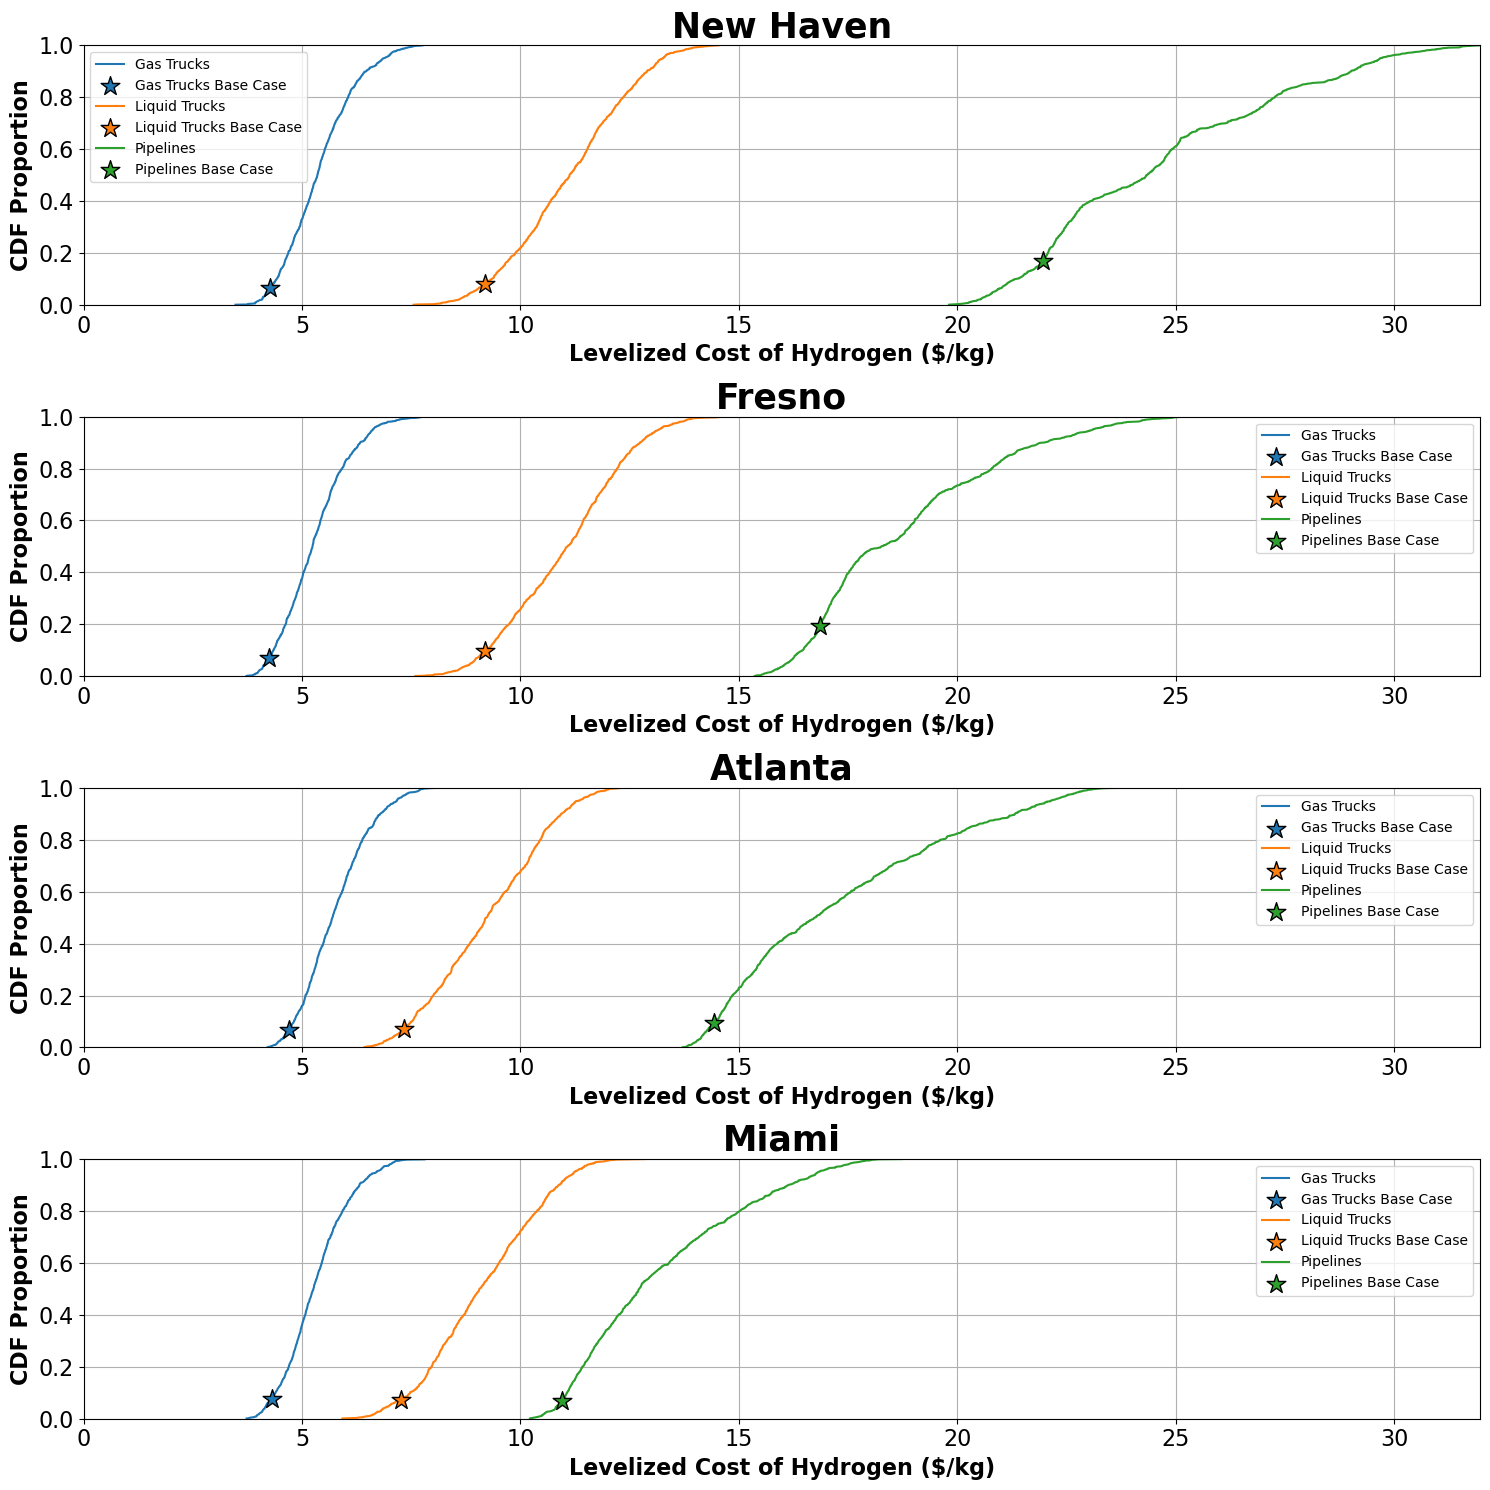

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to your CSV file
csv_file_path = 'Costs with Carbon Tax Data/Distribution Paper - Low Demand w_ Carbon Tax.csv'  # Replace with your actual file path

# Reading the CSV file into a DataFrame, skipping the first row and removing unnamed columns
df = pd.read_csv(csv_file_path, skiprows=1)

# Dropping 'Unnamed' columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Assigning new column names
df.columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]

# Base case values for each city and method
base_case_values = low_demand_values

# Function to plot CDF and add base case star marker with matching line color
def plot_cdf(data, ax, label, base_case=None):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Plot the CDF line and capture the line object to get the color
    line, = ax.plot(sorted_data, cdf, label=label)
    
    # Plot the star at the base case value if it's provided
    if base_case is not None:
        # Find the closest point on the CDF for the base case value
        closest_index = np.abs(sorted_data - base_case).argmin()
        # Use the same color as the line for the star
        ax.scatter(sorted_data[closest_index], cdf[closest_index], color=line.get_color(), edgecolors='black', marker='*', s=200, zorder=5, label=f'{label} Base Case')

    ax.set_ylim(0, 1)
 

# Plotting CDFs
fig, axs = plt.subplots(4, 1, figsize=(15, 15))

cities = ["New Haven", "Fresno", "Atlanta", "Miami"]
methods = ["Gas Trucks", "Liquid Trucks", "Pipelines"]

for i, city in enumerate(cities):
    for method in methods:
        column_name = f"{city} {method}"
        axs[i].set_xlim(x_limits)  # Set consistent x-limits for each subplot
        if column_name in df.columns:
            base_case = base_case_values.get(column_name, None)
            plot_cdf(df[column_name], axs[i], method, base_case=base_case)

    axs[i].set_title(f'{city}', fontsize=25, fontweight='bold')
    axs[i].set_xlabel('Levelized Cost of Hydrogen ($/kg)', fontsize=16, fontweight='bold')
    axs[i].set_ylabel('CDF Proportion', fontsize=16, fontweight='bold')
    axs[i].legend()
    axs[i].grid(True)

    # Use tick_params for tick size
    axs[i].tick_params(axis='x', labelsize=16)
    axs[i].tick_params(axis='y', labelsize=16)


plt.tight_layout()
plt.savefig('Low_Demand_CDF_w_CT')
plt.show()

## Medium Demand

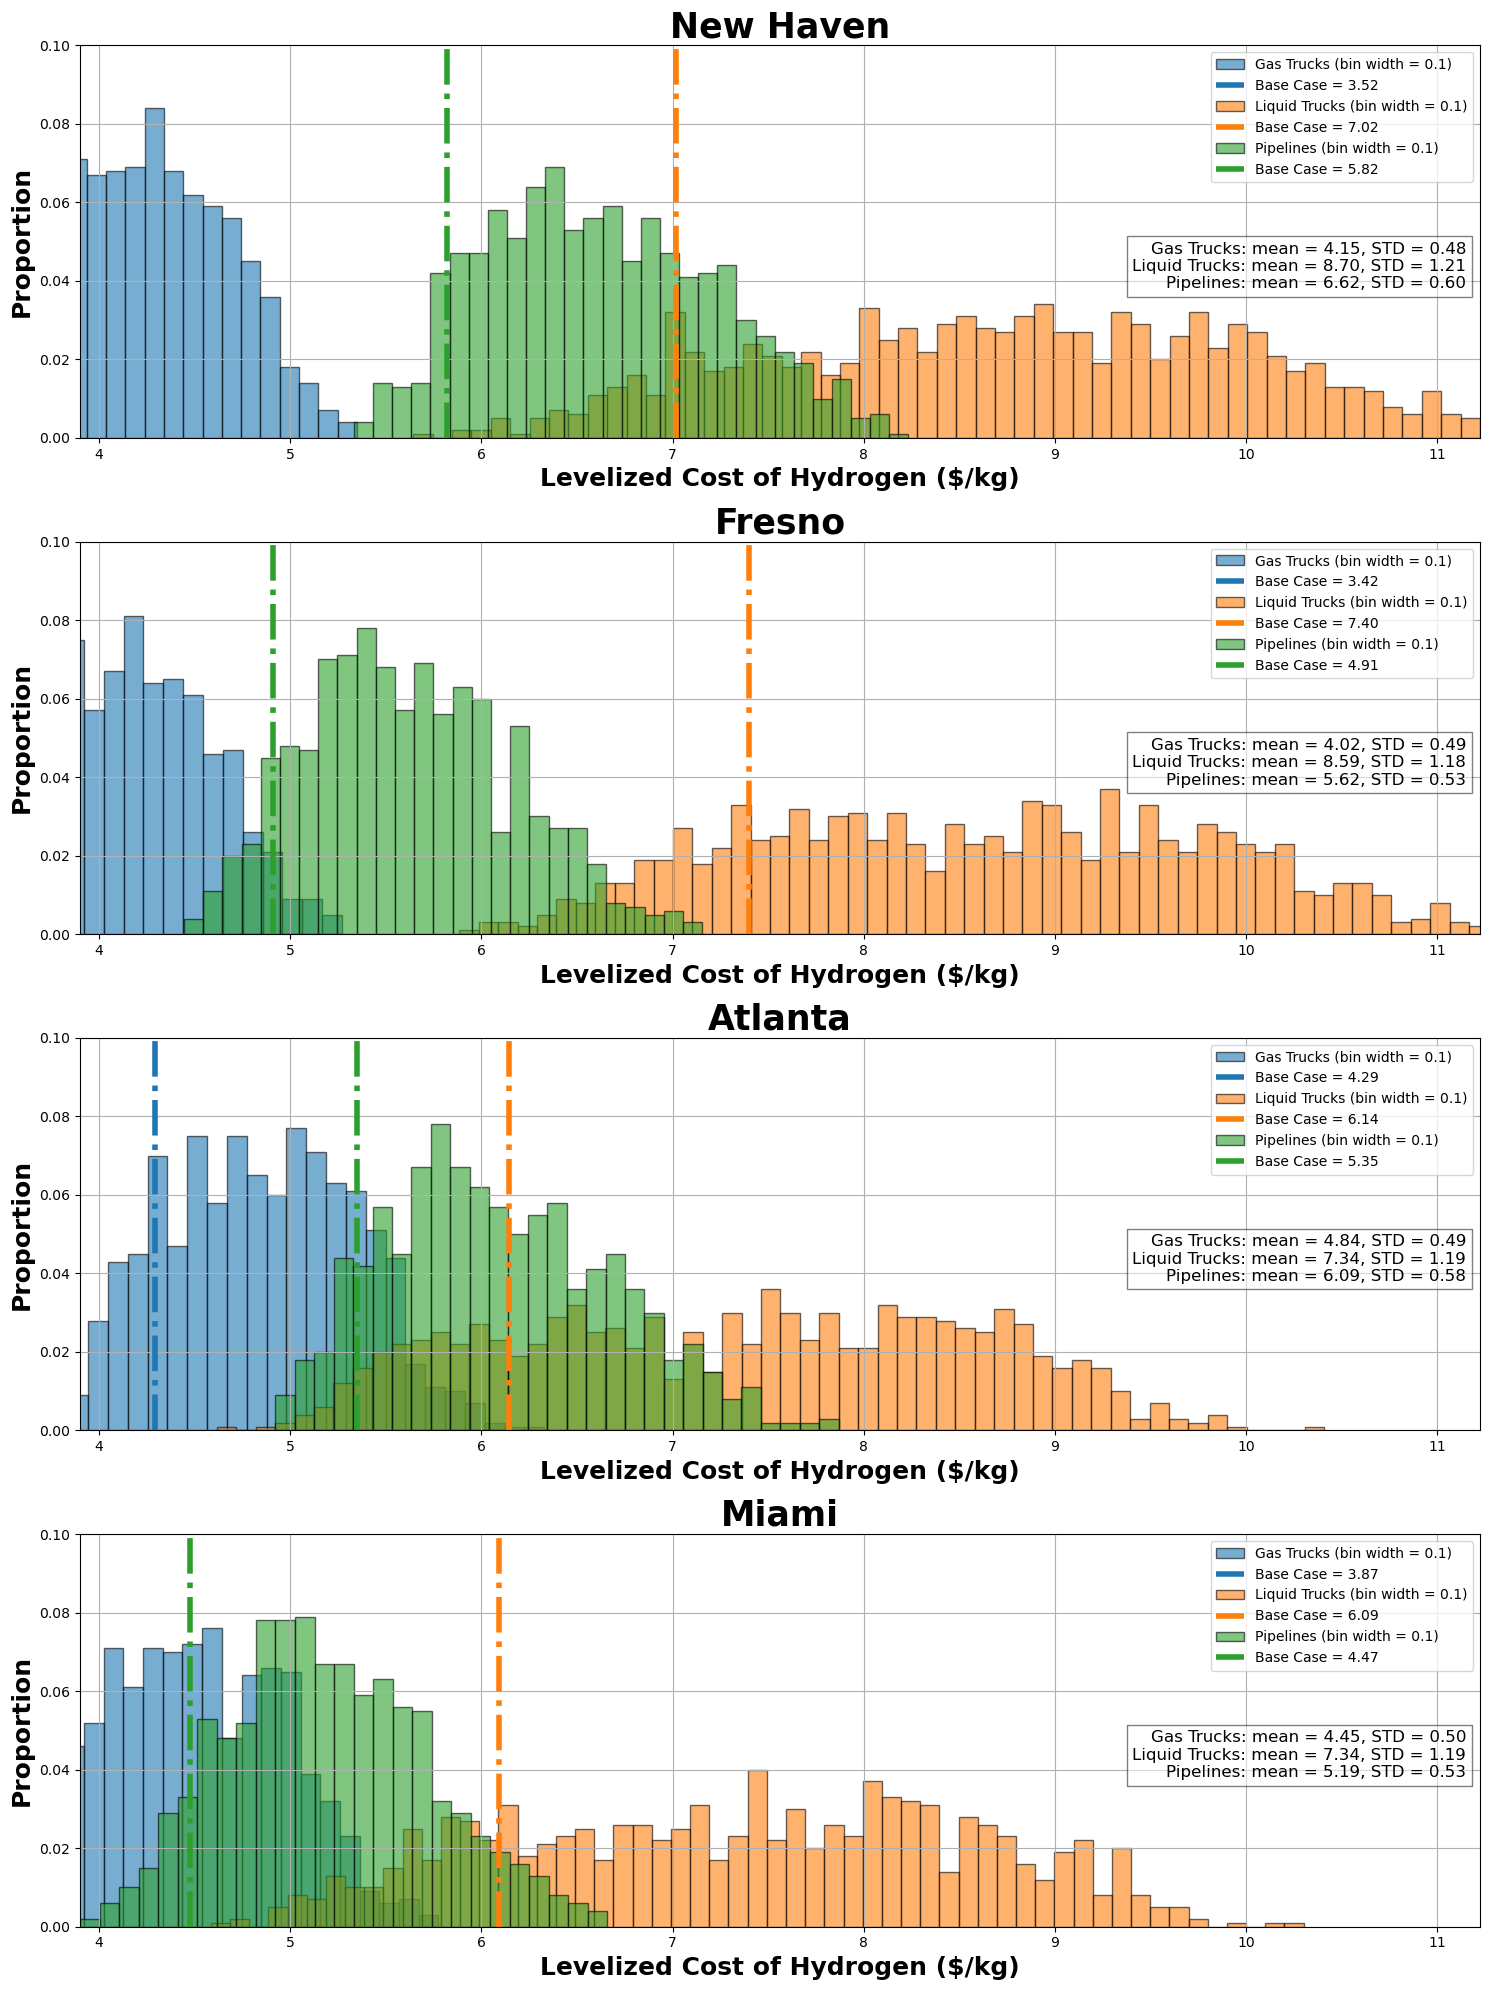

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Path to your CSV file
csv_file_path = 'Costs with Carbon Tax Data/Distribution Paper - Medium Demand w_ Carbon Tax.csv'  # Replace with your actual file path

# Reading the CSV file into a DataFrame, skipping the first row and removing unnamed columns
df = pd.read_csv(csv_file_path, skiprows=1)

# Dropping 'Unnamed' columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Assigning new column names
df.columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]
color_map = {
    "Gas Trucks": "#1f77b4",    # Blue (same as Medium Demand)
    "Liquid Trucks": "#ff7f0e",  # Orange (same as Medium Demand)
    "Pipelines": "#2ca02c"       # Green (same as Medium Demand)
}

# Desired bin width
bin_width = 0.1

# Base case values for each city and method
base_case_values = medium_demand_values
x_limits = (np.min(df['Miami Pipelines']), np.max(df['New Haven Liquid Trucks']))

# Function to plot histogram as proportions with specific bin width and include statistics
def plot_histogram_proportions(data, ax, label, bin_width, method_index, base_case=None):
    # Calculate the range of the data
    data_range = data.max() - data.min()
    # Determine the number of bins based on the range and desired bin width
    num_bins = int(data_range / bin_width)

    # Calculate statistics
    mean = data.mean()
    std = data.std()

    # Plot histogram with the calculated number of bins
    counts, bins, patches = ax.hist(data, bins=num_bins, alpha=0.6, color = color_map[label], label=f"{label} (bin width = {bin_width})", weights=np.ones_like(data) / len(data))
    for patch in patches:
        patch.set_edgecolor('black')  # Add black outline to bars

    # Get the color of the first bar for the base case line (assuming uniform color for all bars)
    if patches:
        line_color = patches[0].get_facecolor()  # Extract color from the first patch
    
        # Plot the base case value as a vertical line with matching color (no transparency)
        if base_case is not None:
            ax.axvline(x=base_case, color=line_color, linestyle='-.', linewidth=4, alpha=1, label=f'Base Case = {base_case:.2f}')  # Set alpha=1 for solid line

    # Adjust the y-axis limit for better visual spacing
    ax.set_ylim(0, 0.1)  # Fixing the y-axis to a consistent limit across all subplots

    # Return stats to display under legend
    return mean, std
    
# Plotting histograms as proportions
fig, axs = plt.subplots(4, 1, figsize=(15, 20))  # Adjust figure size for more space

cities = ["New Haven", "Fresno", "Atlanta", "Miami"]
methods = ["Gas Trucks", "Liquid Trucks", "Pipelines"]

# Create a dictionary to store stats
stats_summary = {}

for i, city in enumerate(cities):
    city_stats = []
    axs[i].set_xlim(x_limits)  # Set consistent x-limits for each subplot
    for method_index, method in enumerate(methods):
        column_name = f"{city} {method}"
        # Condition to skip plotting Gas Trucks for Fresno and Miami
        #if city in ["New Haven", "Fresno", "Atlanta", "Miami"] and method == "Gas Trucks":
            #continue
        if column_name in df.columns:
            base_case = base_case_values.get(column_name, None)
            mean, std = plot_histogram_proportions(df[column_name], axs[i], method, bin_width, method_index, base_case=base_case)
            city_stats.append(f'{method}: mean = {mean:.2f}, STD = {std:.2f}')
    
    axs[i].set_title(f'{city}', fontsize=25, fontweight='bold')
    axs[i].set_xlabel('Levelized Cost of Hydrogen ($/kg)', fontsize=18, fontweight='bold')
    axs[i].set_ylabel('Proportion', fontsize=18, fontweight='bold')
    axs[i].legend(loc='upper right')
    axs[i].grid(True)
    
    # Display the stats under the legend
    axs[i].text(0.99, 0.5, "\n".join(city_stats), transform=axs[i].transAxes, fontsize=12,
                verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()

# Save the figure as an image file
plt.savefig('Medium_Demand_Histograms_w_CT')
plt.show()


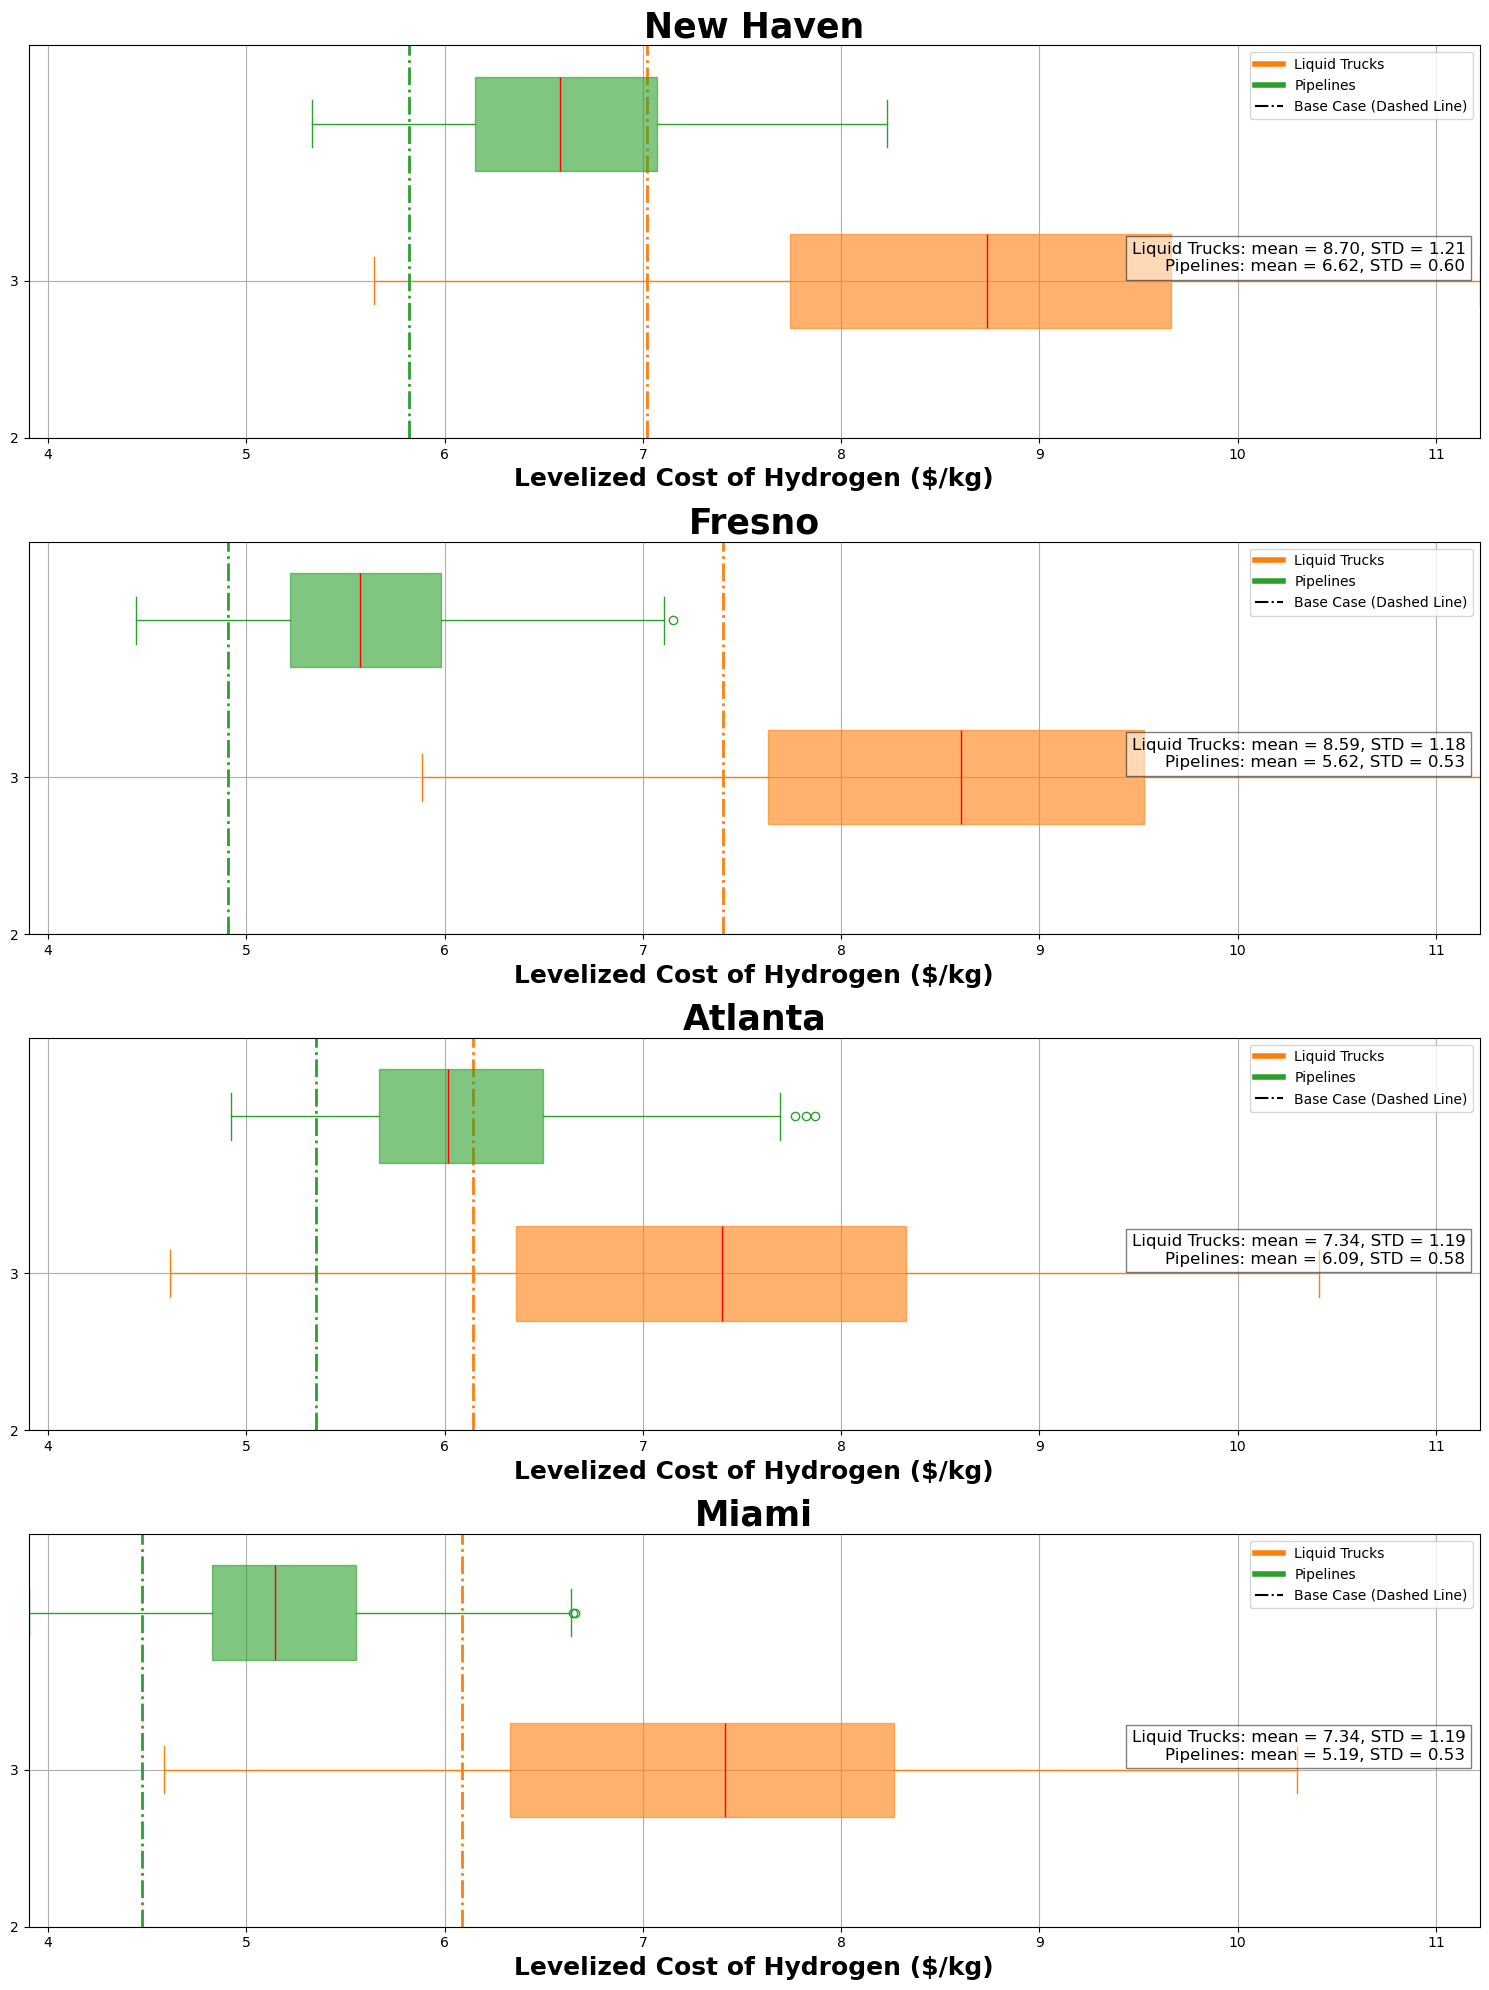

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

# Path to your CSV file (adjust accordingly)
csv_file_path = 'Costs with Carbon Tax Data/Distribution Paper - Medium Demand w_ Carbon Tax.csv'  # Replace with your actual file path

# Reading the CSV file into a DataFrame, skipping the first row and removing unnamed columns
df = pd.read_csv(csv_file_path, skiprows=1)

# Dropping 'Unnamed' columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Drop the "Gas Trucks" columns (since we are not plotting them)
df = df.drop(columns=[col for col in df.columns if 'Gas Trucks' in col])

# Now we can rename the remaining 8 columns
df.columns = [
    "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Liquid Trucks", "Miami Pipelines",
]

# Color scheme
color_map = {
    "Gas Trucks": "#1f77b4",    # Blue (same as Medium Demand)
    "Liquid Trucks": "#ff7f0e",  # Orange (same as Medium Demand)
    "Pipelines": "#2ca02c"       # Green (same as Medium Demand)
}


# Base case values for each city and method
base_case_values = medium_demand_values

# Function to plot boxplots with specific base case and include statistics
def plot_boxplot(data, ax, label, method_index, base_case=None):
    # Plot boxplot horizontally with specified color
    ax.boxplot(data, vert=False, positions=[method_index], widths=0.6, patch_artist=True,
               boxprops=dict(facecolor=color_map[label], color=color_map[label], alpha=0.6),
               medianprops=dict(color='red'),
               whiskerprops=dict(color=color_map[label]),
               capprops=dict(color=color_map[label]),
               flierprops=dict(markeredgecolor=color_map[label]))

    # Plot the base case value as a vertical line inside the boxplot (with matching color)
    if base_case is not None:
        ax.axvline(x=base_case, color=color_map[label], linestyle='-.', linewidth=2)

    # Calculate and return statistics
    mean = np.mean(data)
    std = np.std(data)
    return mean, std

# Plotting boxplots as proportions
fig, axs = plt.subplots(4, 1, figsize=(15, 20))  # Adjust figure size for more space

cities = ["New Haven", "Fresno", "Atlanta", "Miami"]
methods = ["Gas Trucks", "Liquid Trucks", "Pipelines"]

# Create a dictionary to store stats
stats_summary = {}
x_limits = (np.min(df['Miami Pipelines']), np.max(df['New Haven Liquid Trucks']))
for i, city in enumerate(cities):
    city_stats = []
    legend_handles = []  # Initialize legend handles for each city
    axs[i].set_xlim(x_limits)  # Set consistent x-limits for each subplot
    for method_index, method in enumerate(methods):
        column_name = f"{city} {method}"
        if column_name in df.columns and not df[column_name].isnull().all():  # Only include methods with data
            base_case = base_case_values.get(column_name, None)
            data = df[column_name].dropna().values  # Drop NaNs and extract values for the boxplot
            mean, std = plot_boxplot(data, axs[i], method, method_index + 1, base_case=base_case)
            city_stats.append(f'{method}: mean = {mean:.2f}, STD = {std:.2f}')
            
            # Add the method to the legend dynamically
            legend_handles.append(mlines.Line2D([], [], color=color_map[method], lw=4, label=method))
    
    # Always add the base case legend
    base_case_legend = mlines.Line2D([], [], color='black', linestyle='-.', label='Base Case (Dashed Line)')
    legend_handles.append(base_case_legend)
    
    axs[i].set_title(f'{city}', fontsize=25, fontweight='bold')
    axs[i].set_xlabel('Levelized Cost of Hydrogen ($/kg)', fontsize=18, fontweight='bold')
    axs[i].set_yticks([1, 2])  # Positions for the boxplots
    #axs[i].set_yticklabels(methods)  # Label the methods
    axs[i].grid(True)
    
    # Display the stats under the legend
    axs[i].text(0.99, 0.5, "\n".join(city_stats), transform=axs[i].transAxes, fontsize=12,
                verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

    # Add dynamic legend to each subplot
    axs[i].legend(handles=legend_handles, loc='upper right')

plt.tight_layout()

# Save the figure as an image file
plt.savefig('Medium_Demand_Boxplots_w_CT')
plt.show()


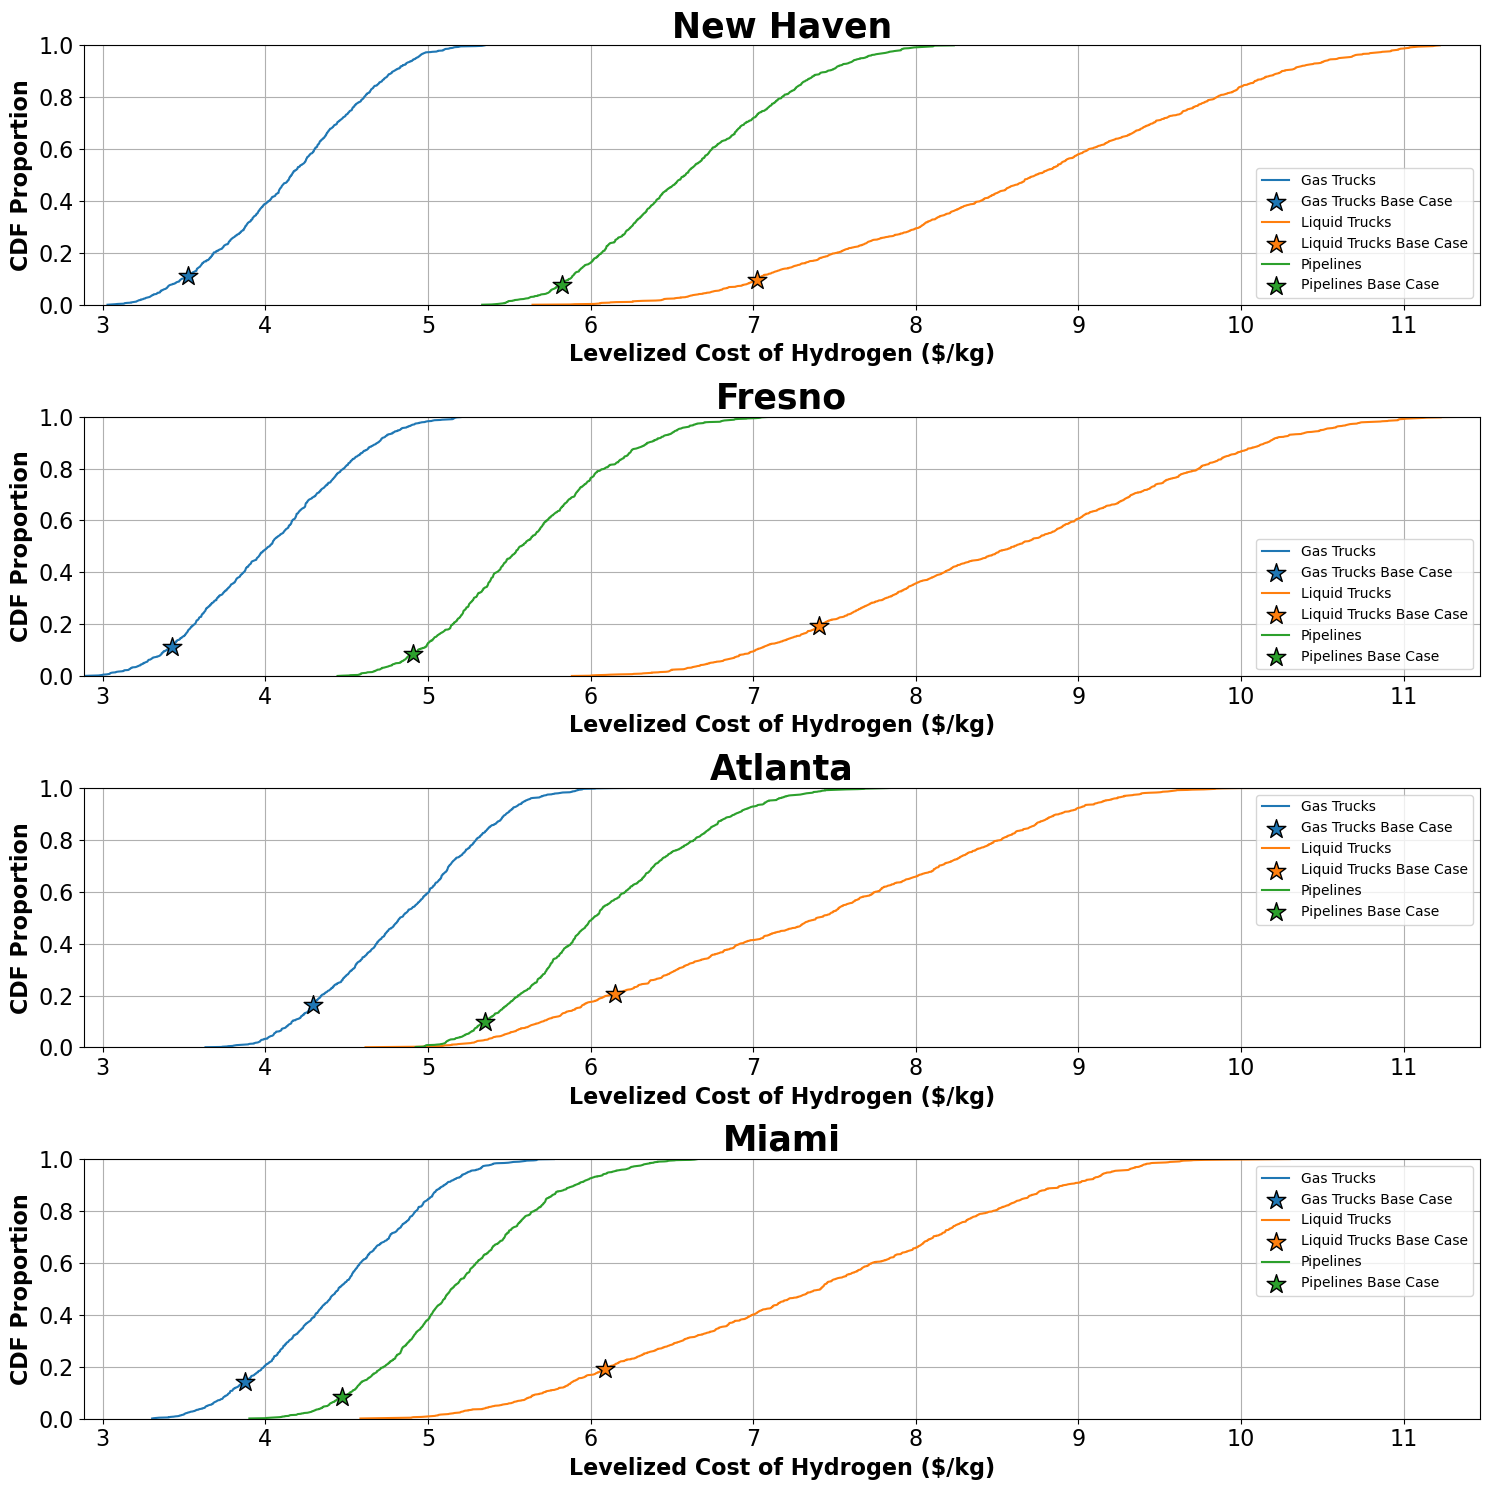

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to your CSV file
csv_file_path = 'Costs with Carbon Tax Data/Distribution Paper - Medium Demand w_ Carbon Tax.csv'  # Replace with your actual file path

# Reading the CSV file into a DataFrame, skipping the first row and removing unnamed columns
df = pd.read_csv(csv_file_path, skiprows=1)

# Dropping 'Unnamed' columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Assigning new column names
df.columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]

# Base case values for each city and method
base_case_values = medium_demand_values

# Determine x-axis limits
x_limits = (np.min(df.min()), np.max(df.max()))

# Function to plot CDF and add base case star marker with matching line color
def plot_cdf(data, ax, label, color, base_case=None):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Plot the CDF line
    ax.plot(sorted_data, cdf, label=label, color=color)
    
    # Plot the star at the base case value if it's provided
    if base_case is not None:
        # Find the closest point on the CDF for the base case value
        closest_index = np.abs(sorted_data - base_case).argmin()
        # Use the same color as the line for the star
        ax.scatter(
            sorted_data[closest_index], cdf[closest_index],
            color=color, marker='*', edgecolors='black',
            s=200, zorder=5, label=f'{label} Base Case'
        )

    ax.set_ylim(0, 1)

# Plotting CDFs
fig, axs = plt.subplots(4, 1, figsize=(15, 15))

cities = ["New Haven", "Fresno", "Atlanta", "Miami"]
methods = {
    "Gas Trucks": "#1f77b4",    # Blue
    "Liquid Trucks": "#ff7f0e",  # Orange
    "Pipelines": "#2ca02c"       # Green
}

for i, city in enumerate(cities):
    for method, color in methods.items():
        column_name = f"{city} {method}"
        axs[i].set_xlim(x_limits)  # Set consistent x-limits for each subplot
        if column_name in df.columns:
            base_case = base_case_values.get(column_name, None)
            plot_cdf(df[column_name], axs[i], method, color=color, base_case=base_case)

    axs[i].set_title(f'{city}', fontsize=25, fontweight='bold')
    axs[i].set_xlabel('Levelized Cost of Hydrogen ($/kg)', fontsize=16, fontweight='bold')
    axs[i].set_ylabel('CDF Proportion', fontsize=16, fontweight='bold')
    axs[i].legend()
    axs[i].grid(True)

    # Use tick_params for tick size
    axs[i].tick_params(axis='x', labelsize=16)
    axs[i].tick_params(axis='y', labelsize=16)

plt.tight_layout()
plt.savefig('Medium_Demand_CDF_w_CT')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Path to your CSV file
csv_file_path = 'Costs with Carbon Tax Data/Distribution Paper - Medium Demand w_ Carbon Tax.csv'  # Replace with your actual file path

# Reading the CSV file into a DataFrame, skipping the first row and removing unnamed columns
df = pd.read_csv(csv_file_path, skiprows=1)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Dropping 'Unnamed' columns

# Assigning new column names
df.columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]

# Base case values for each city and method
base_case_values = medium_demand_values

# Settings
bin_width = 0.1  # Bin width for histograms
color_map = {"Gas Trucks":"#1f77b4", "Liquid Trucks": "#ff7f0e", "Pipelines": "#2ca02c"}  # Only Liquid Trucks and Pipelines
cities = ["New Haven", "Fresno", "Atlanta", "Miami"]
methods = ["Gas Trucks", "Liquid Trucks", "Pipelines"]  # Removed Gas Trucks from methods

# Define consistent x-axis limits and ticks
x_limits = (0, 31.958494)
x_ticks = np.arange(0, 36, 5)  # x-ticks from 0 to 35 in increments of 5

# Create figure and subplots for each city
fig, axs = plt.subplots(len(cities), 1, figsize=(15, 20))  # 1 column, 4 rows for each city

for i, city in enumerate(cities):
    ax = axs[i]
    ax.set_title(f'{city}', fontsize=18, fontweight='bold')
    ax.set_ylim(0, 0.15)  # Set y-limits for histogram proportions
    ax.set_xlim(x_limits)  # Set consistent x-limits for each subplot

    # Set x-tick positions and labels explicitly for each subplot
    ax.set_xticks(x_ticks)  # Set x-tick positions
    ax.set_xticklabels([str(int(tick)) for tick in x_ticks], fontsize=16)  # Set x-tick labels
    ax.tick_params(axis='y', which='both', labelsize=16)  # Set label size for y-axis
    ax.tick_params(axis='x', which='both', length=5)  # Set tick length for x-axis

    # Create a secondary y-axis for boxplots without ticks on the right
    ax_box = ax.twinx()
    ax_box.set_ylim(-0.05, 0.05)  # Separate y-limits for boxplots above histograms
    ax_box.set_yticks([])  # Hide y-ticks for boxplot axis
    ax_box.set_xlim(x_limits)  # Ensure consistent x-limits on boxplot axis

    # Prepare a list to collect mean and std information for legend text
    method_stats = []

    # Plot each method (Liquid Trucks, Pipelines) for the current city
    for method in methods:
        column_name = f"{city} {method}"
        data = df[column_name].dropna().values  # Drop NaNs and extract values
        base_case = base_case_values.get(column_name)
        color = color_map[method]

        # Plot histogram for each method
        data_range = data.max() - data.min()
        num_bins = int(data_range / bin_width)
        ax.hist(data, bins=num_bins, color=color, alpha=0.6, 
                weights=np.ones_like(data) / len(data), edgecolor='black')
        
        # Overlay boxplot on secondary y-axis with smaller width
        ax_box.boxplot(data, vert=False, widths=0.01,  # Adjust boxplot width to be narrower
                       patch_artist=True, positions=[0.04],  # Position boxplot above histogram
                       boxprops=dict(facecolor=color, color=color, alpha=0.6),
                       medianprops=dict(color='red'), whiskerprops=dict(color=color),
                       capprops=dict(color=color), flierprops=dict(markeredgecolor=color))
        
        # Calculate mean and standard deviation, and format for display
        mean = data.mean()
        std_dev = data.std()
        method_stats.append(f"{method}: mean = {mean:.2f}, STD = {std_dev:.2f}")

        # Add base case as a vertical dashed line
        if base_case is not None:
            ax.axvline(x=base_case, color=color, linestyle='--', linewidth=2, alpha=0.7)

    # Display mean and std information in the lower-right corner of the plot
    ax.text(0.99, 0.5, "\n".join(method_stats), transform=ax.transAxes, fontsize=16,
            verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

    # Set x-axis label for each subplot
    ax.set_title(f'{city}', fontsize=25, fontweight='bold')
    ax.set_xlabel('Levelized Cost of Hydrogen ($/kg)', fontsize=16, fontweight='bold')
    ax.set_ylabel('Proportion', fontsize=16, fontweight='bold')
    ax.grid(True)

# Manually add a custom legend for the entire figure
#custom_legend = [
#    Line2D([0], [0], color=color_map["Gas Trucks"], lw=4, label="Gas Trucks"),
#    Line2D([0], [0], color=color_map["Liquid Trucks"], lw=4, label="Liquid Trucks"),
#    Line2D([0], [0], color=color_map["Pipelines"], lw=4, label="Pipelines"),
#    Line2D([0], [0], color='black', linestyle='--', linewidth=2, label='Base Case (Dashed Line)')
#]
#fig.legend(handles=custom_legend, loc='upper center', ncol=3, fontsize=16, frameon=True)

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust top to make room for legend
plt.savefig('Final Plots/Medium_Demand_Hist_Box_w_CC.png')
plt.show()


In [ ]:
df

## High Demand

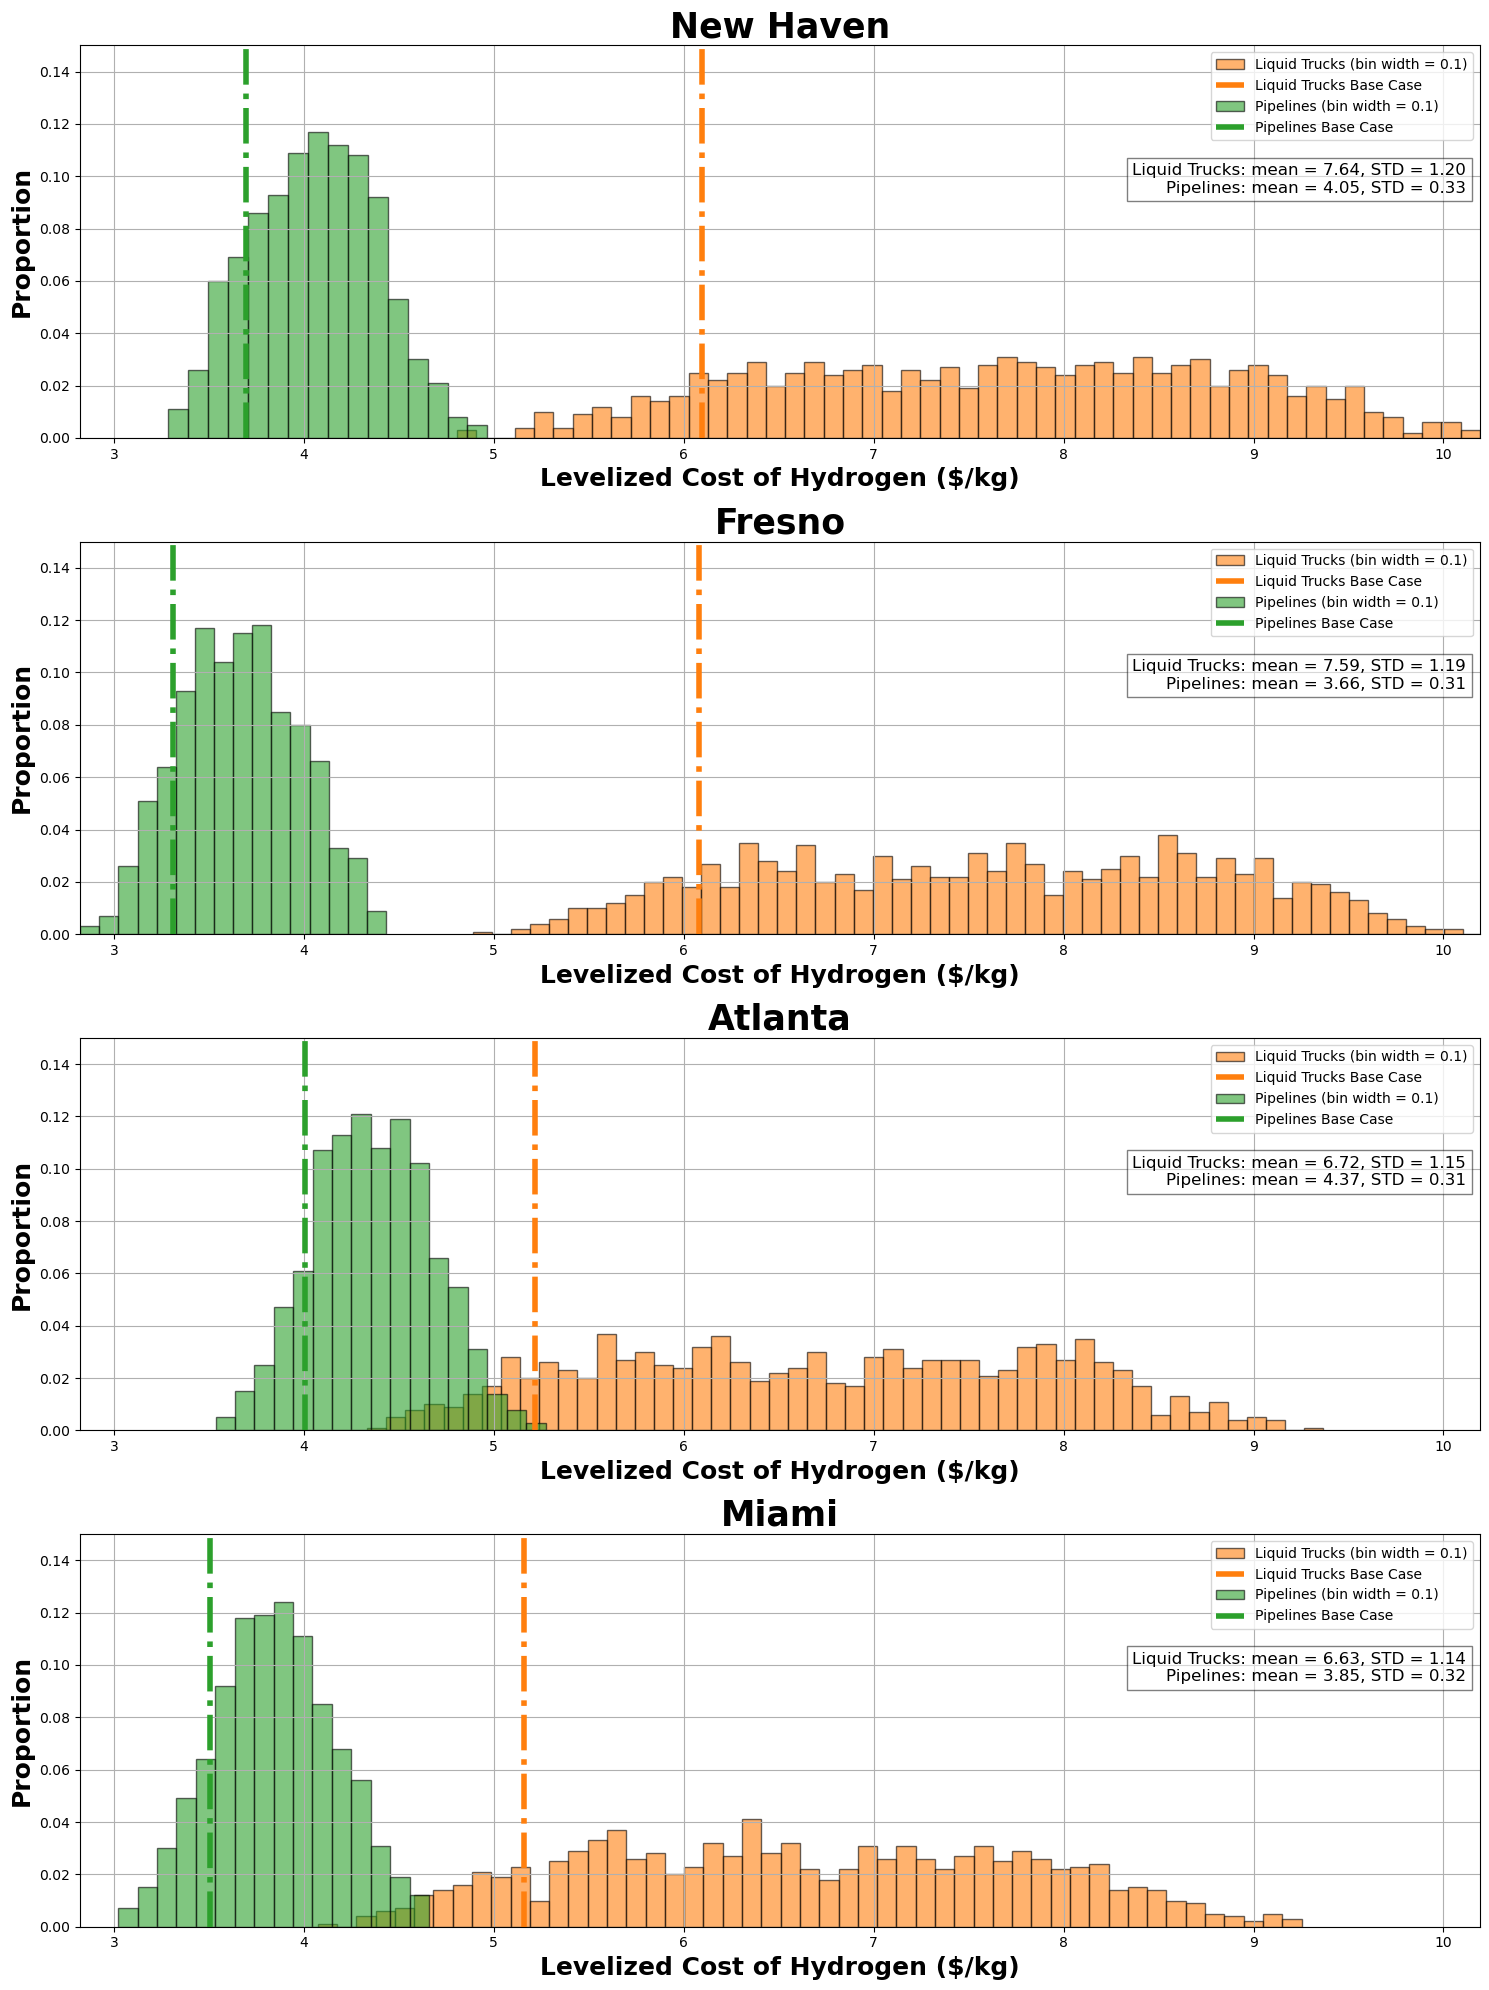

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Path to your CSV file
csv_file_path = 'Costs with Carbon Tax Data/Distribution Paper - High Demand w_ Carbon Tax.csv'  # Replace with your actual file path

# Reading the CSV file into a DataFrame, skipping the first row and removing unnamed columns
df = pd.read_csv(csv_file_path, skiprows=1)

# Dropping 'Unnamed' columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Assigning new column names
df.columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]

# Desired bin width
bin_width = 0.1

# Base case values for each city and method
base_case_values = high_demand_values

# Color mapping for each method
color_map = {
    "Liquid Trucks": "#ff7f0e",  # Orange
    "Pipelines": "#2ca02c"       # Green
}

# Function to plot histogram as proportions with specific bin width and include base case
def plot_histogram_proportions(data, ax, label, bin_width, base_case=None):
    # Calculate the range of the data
    data_range = data.max() - data.min()
    # Determine the number of bins based on the range and desired bin width
    num_bins = int(data_range / bin_width)

    # Calculate statistics
    mean = data.mean()
    std = data.std()

    # Plot histogram with the calculated number of bins
    counts, bins, patches = ax.hist(data, bins=num_bins, alpha=0.6, color=color_map[label], label=f"{label} (bin width = {bin_width})", weights=np.ones_like(data) / len(data))
    for patch in patches:
        patch.set_edgecolor('black')  # Add black outline to bars

    # Plot the base case value as a vertical line and a star marker
    if base_case is not None:
        # Plot the vertical line for the base case
        ax.axvline(x=base_case, alpha = 1, color=color_map[label], linestyle='-.', linewidth=4, label=f'{label} Base Case')

    # Adjust the y-axis limit for better visual spacing
    ax.set_ylim(0, 0.15)  # Fixing the y-axis to a consistent limit across all subplots

    # Return stats to display under legend
    return mean, std

# Plotting histograms as proportions
fig, axs = plt.subplots(4, 1, figsize=(15, 20))  # Adjust figure size for more space

cities = ["New Haven", "Fresno", "Atlanta", "Miami"]
methods = ["Liquid Trucks", "Pipelines"]

# Create a dictionary to store stats
stats_summary = {}
x_limits = (np.min(df['Fresno Pipelines']), np.max(df['New Haven Liquid Trucks']))

for i, city in enumerate(cities):
    city_stats = []
    axs[i].set_xlim(x_limits)  # Set consistent x-limits for each subplot
    for method_index, method in enumerate(methods):
        column_name = f"{city} {method}"
        if column_name in df.columns:
            # Get the base case value for the current method and city
            base_case = base_case_values.get(column_name, None)
            mean, std = plot_histogram_proportions(df[column_name], axs[i], method, bin_width, base_case=base_case)
            city_stats.append(f'{method}: mean = {mean:.2f}, STD = {std:.2f}')
    
    axs[i].set_title(f'{city}', fontsize=25, fontweight='bold')
    axs[i].set_xlabel('Levelized Cost of Hydrogen ($/kg)', fontsize=18, fontweight='bold')
    axs[i].set_ylabel('Proportion', fontsize=18, fontweight='bold')
    axs[i].legend(loc='upper right')
    axs[i].grid(True)
    
    # Display the stats under the legend
    axs[i].text(0.99, 0.7, "\n".join(city_stats), transform=axs[i].transAxes, fontsize=12,
                verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()

# Save the figure as an image file
plt.savefig('High_Demand_Histograms_w_CT')
plt.show()


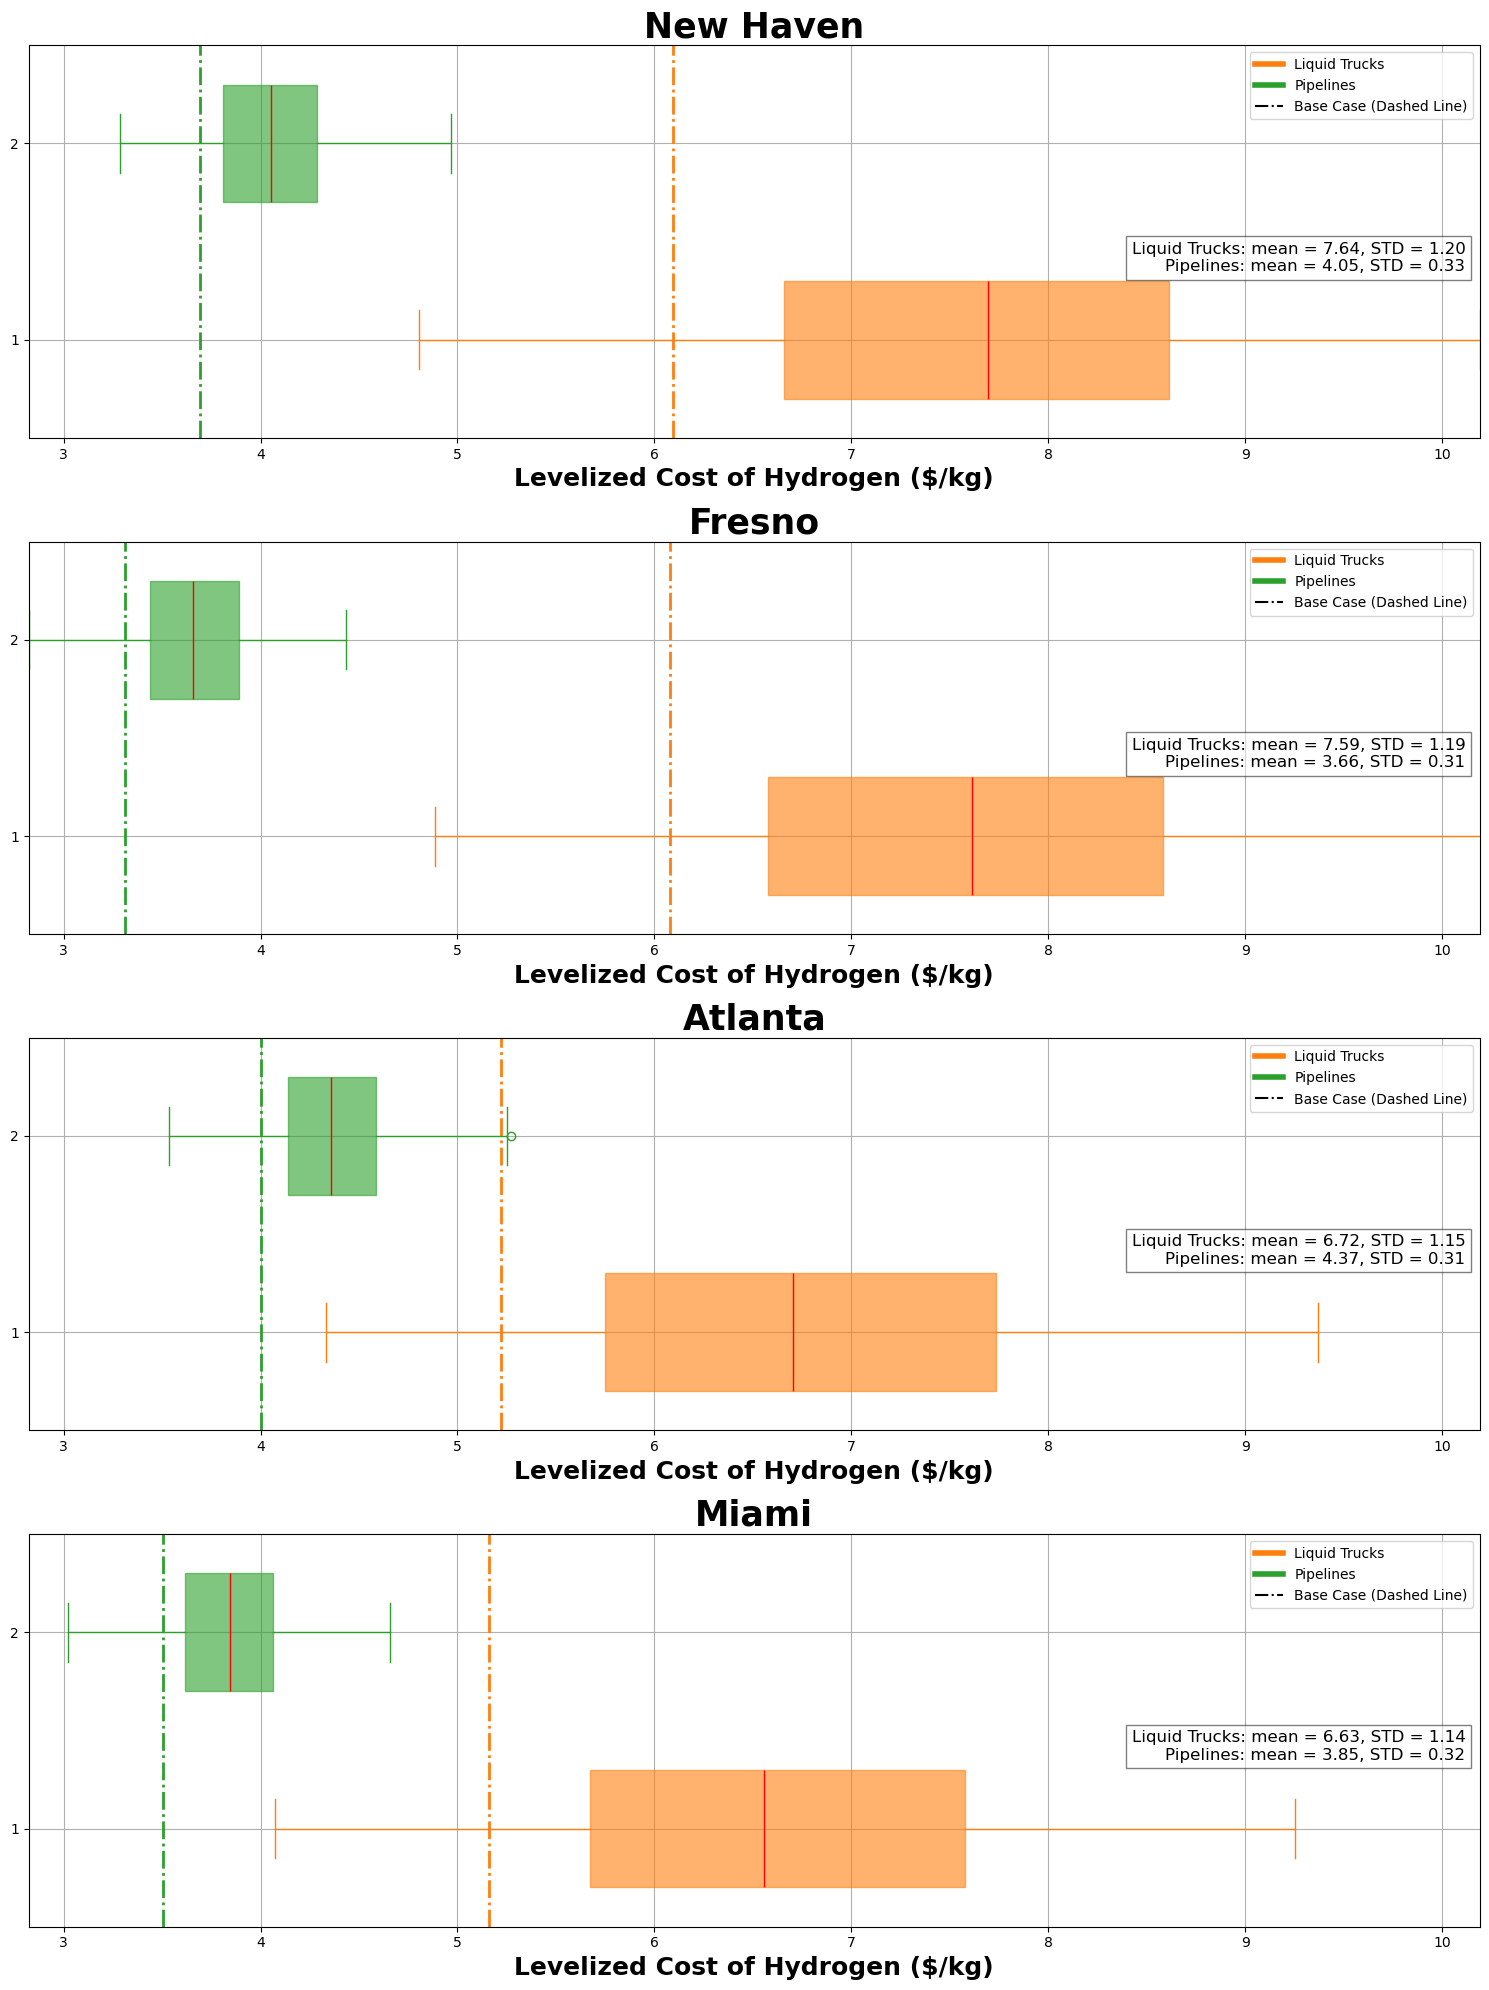

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

# Path to your CSV file (adjust accordingly)
csv_file_path = 'Costs with Carbon Tax Data/Distribution Paper - High Demand w_ Carbon Tax.csv'  # Replace with your actual file path

# Reading the CSV file into a DataFrame, skipping the first row and removing unnamed columns
df = pd.read_csv(csv_file_path, skiprows=1)

# Dropping 'Unnamed' columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Drop the "Gas Trucks" columns (since we are not plotting them)
df = df.drop(columns=[col for col in df.columns if 'Gas Trucks' in col])

# Assigning new column names
df.columns = [
    "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Liquid Trucks", "Miami Pipelines",
]

# Base case values for each city and method
base_case_values = high_demand_values

# Color mapping for each method
color_map = {
    "Liquid Trucks": "#ff7f0e",  # Orange
    "Pipelines": "#2ca02c"       # Green
}

# Function to plot boxplots with specific base case and include statistics
def plot_boxplot(data, ax, label, method_index, base_case=None):
    # Plot boxplot horizontally with specified color
    ax.boxplot(data, vert=False, positions=[method_index], widths=0.6, patch_artist=True,
               boxprops=dict(facecolor=color_map[label], color=color_map[label], alpha=0.6),
               medianprops=dict(color='red'),
               whiskerprops=dict(color=color_map[label]),
               capprops=dict(color=color_map[label]),
               flierprops=dict(markeredgecolor=color_map[label]))

    # Plot the base case value as a vertical line inside the boxplot (with matching color)
    if base_case is not None:
        ax.axvline(x=base_case, color=color_map[label], linestyle='-.', linewidth=2)

    # Return statistics
    mean = np.mean(data)
    std = np.std(data)
    return mean, std

# Plotting boxplots
fig, axs = plt.subplots(4, 1, figsize=(15, 20))  # Adjust figure size for more space

cities = ["New Haven", "Fresno", "Atlanta", "Miami"]
methods = ["Liquid Trucks", "Pipelines"]

# Create a dictionary to store stats
stats_summary = {}
x_limits = (np.min(df['Fresno Pipelines']), np.max(df['New Haven Liquid Trucks']))

for i, city in enumerate(cities):
    city_stats = []
    legend_handles = []  # Create a list to store handles for the legend
    axs[i].set_xlim(x_limits)  # Set consistent x-limits for each subplot
    for method_index, method in enumerate(methods):
        column_name = f"{city} {method}"
        if column_name in df.columns:
            # Get the base case value for the current method and city
            base_case = base_case_values.get(column_name, None)
            data = df[column_name].dropna().values  # Drop NaNs and extract values for the boxplot
            mean, std = plot_boxplot(data, axs[i], method, method_index + 1, base_case=base_case)
            city_stats.append(f'{method}: mean = {mean:.2f}, STD = {std:.2f}')
            
            # Add the method to the legend
            legend_handles.append(mlines.Line2D([], [], color=color_map[method], lw=4, label=method))
    
    # Add the base case line to the legend
    base_case_legend = mlines.Line2D([], [], color='black', linestyle='-.', label='Base Case (Dashed Line)')
    legend_handles.append(base_case_legend)

    axs[i].set_title(f'{city}', fontsize=25, fontweight='bold')
    axs[i].set_xlabel('Levelized Cost of Hydrogen ($/kg)', fontsize=18, fontweight='bold')
    axs[i].set_yticks([1, 2])  # Positions for the boxplots
    #axs[i].set_yticklabels(methods)  # Label the methods
    axs[i].grid(True)
    
    # Display the stats under the legend
    axs[i].text(0.99, 0.5, "\n".join(city_stats), transform=axs[i].transAxes, fontsize=12,
                verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

    # Add the dynamic legend
    axs[i].legend(handles=legend_handles, loc='upper right')

plt.tight_layout()

# Save the figure as an image file
plt.savefig('High_Demand_Boxplots_w_CT')
plt.show()


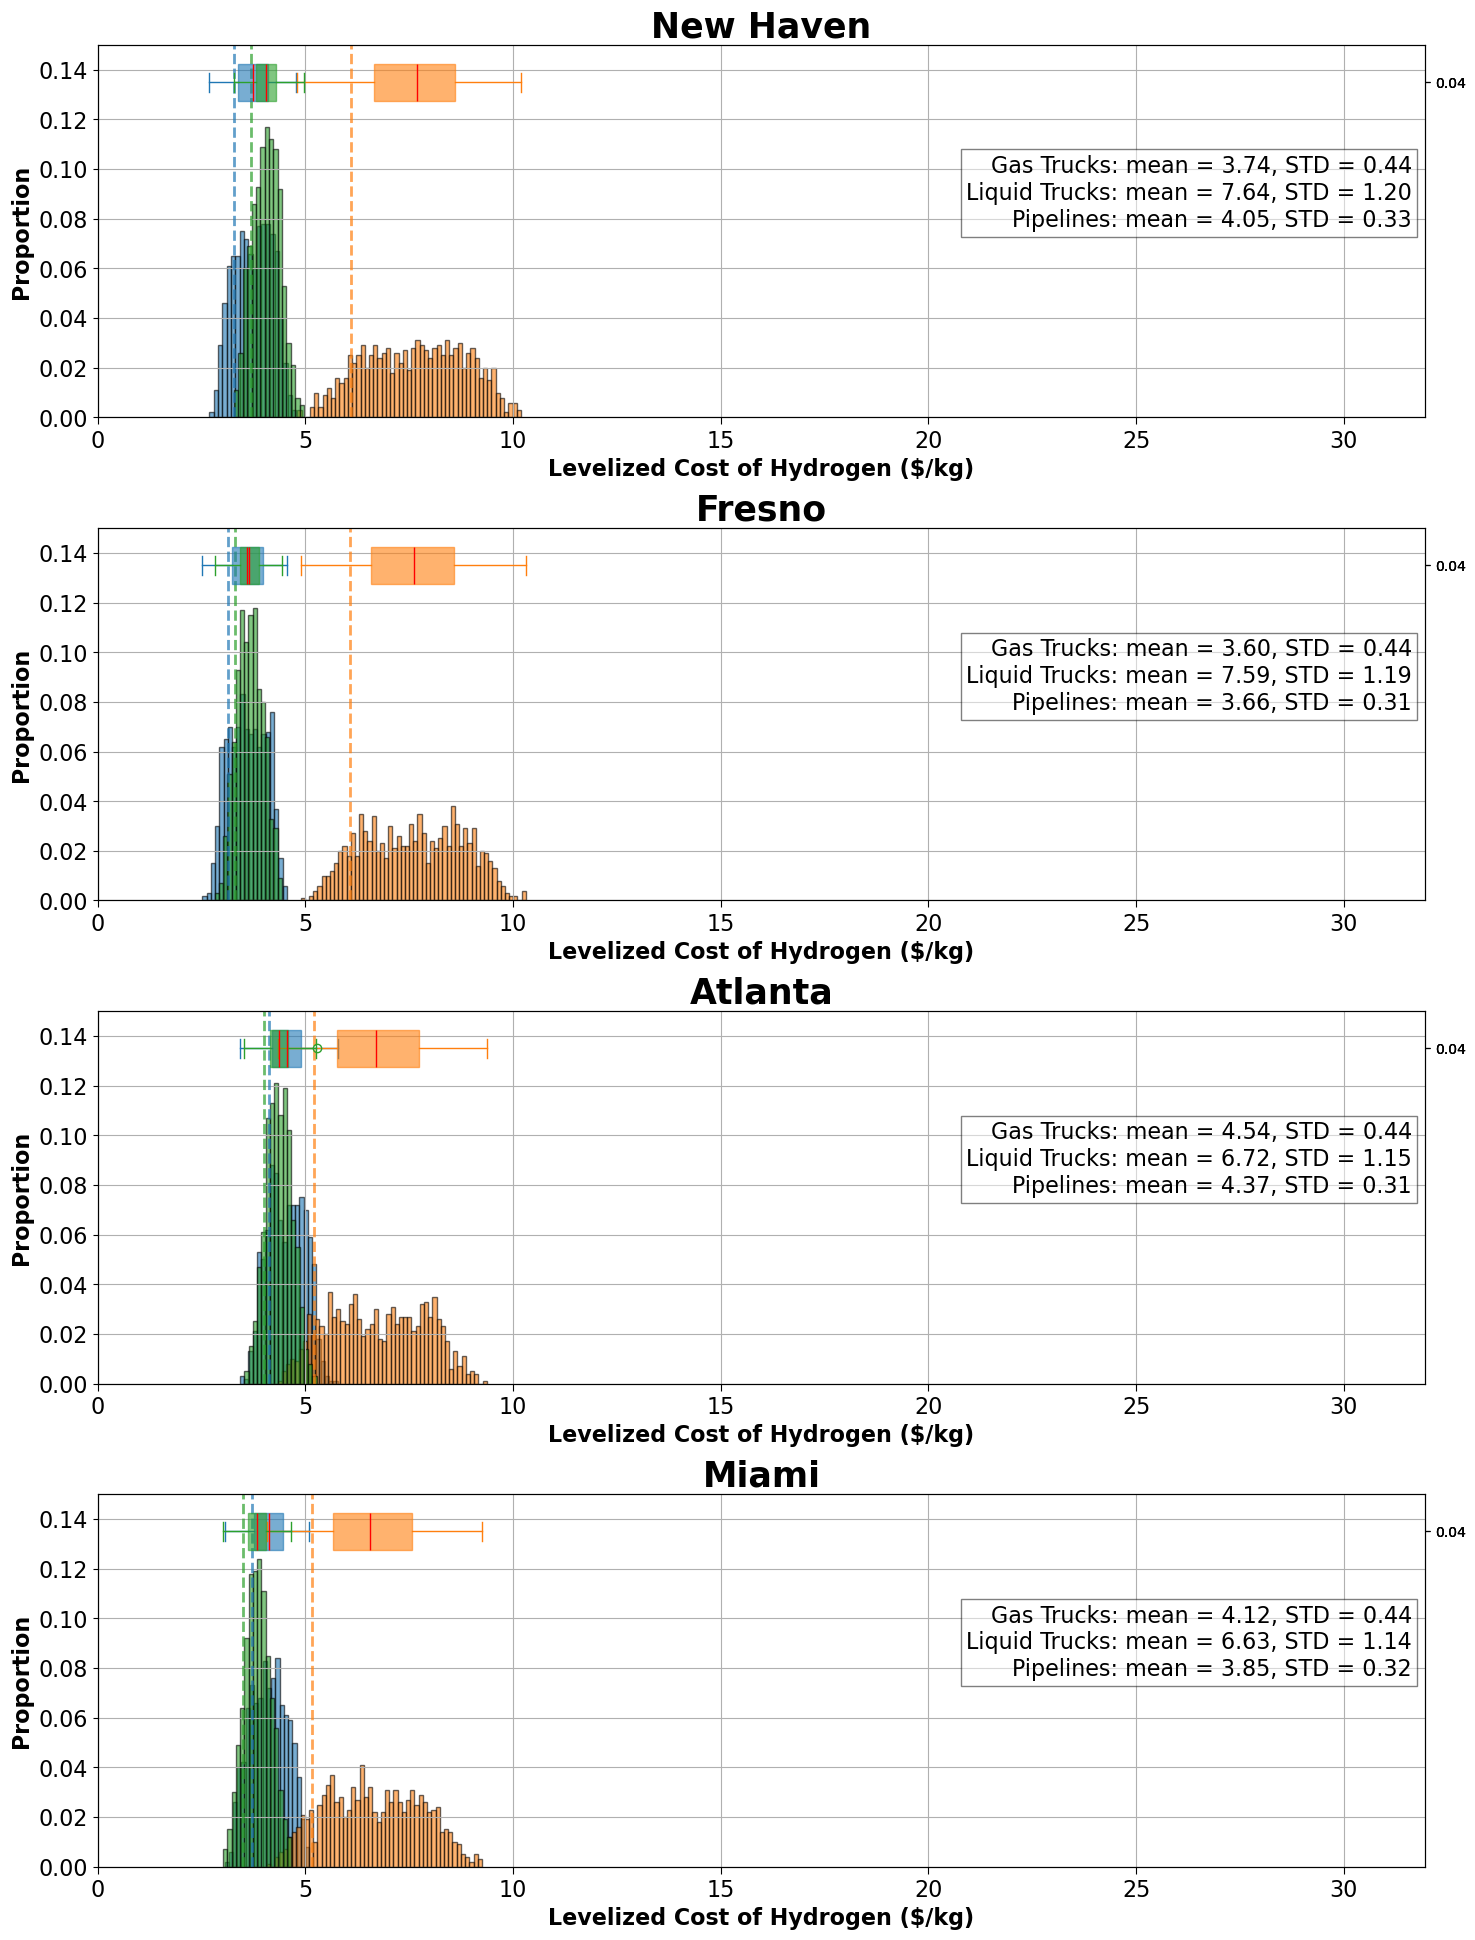

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Path to your CSV file
csv_file_path = 'Costs with Carbon Tax Data/Distribution Paper - High Demand w_ Carbon Tax.csv'  # Replace with your actual file path

# Reading the CSV file into a DataFrame, skipping the first row and removing unnamed columns
df = pd.read_csv(csv_file_path, skiprows=1)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Dropping 'Unnamed' columns

# Assigning new column names
df.columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]

# Base case values for each city and method
base_case_values = high_demand_values

# Settings
bin_width = 0.1  # Bin width for histograms
color_map = {"Gas Trucks":"#1f77b4","Liquid Trucks": "#ff7f0e", "Pipelines": "#2ca02c"}  # Only Liquid Trucks and Pipelines
cities = ["New Haven", "Fresno", "Atlanta", "Miami"]
methods = ["Gas Trucks", "Liquid Trucks", "Pipelines"]  # Removed Gas Trucks from methods

# Define consistent x-axis limits and ticks
x_limits = (0, 31.958494)
x_ticks = np.arange(0, 36, 5)  # x-ticks from 0 to 35 in increments of 5

# Create figure and subplots for each city
fig, axs = plt.subplots(len(cities), 1, figsize=(15, 20))  # 1 column, 4 rows for each city

for i, city in enumerate(cities):
    ax = axs[i]
    ax.set_title(f'{city}', fontsize=18, fontweight='bold')
    ax.set_ylim(0, 0.15)  # Set y-limits for histogram proportions
    ax.set_xlim(x_limits)  # Set consistent x-limits for each subplot

    # Set x-tick positions and labels explicitly for each subplot
    ax.set_xticks(x_ticks)  # Set x-tick positions
    ax.set_xticklabels([str(int(tick)) for tick in x_ticks], fontsize=16)  # Set x-tick labels
    ax.tick_params(axis='x', which='both', length=5)  # Set tick length for x-axis

    # Create a secondary y-axis for boxplots without ticks on the right
    ax_box = ax.twinx()
    ax_box.set_ylim(-0.05, 0.05)  # Separate y-limits for boxplots above histograms
    ax_box.set_yticks([])  # Hide y-ticks for boxplot axis
    ax.tick_params(axis='y', which='both', labelsize=16)  # Set label size for y-axis
    ax_box.set_xlim(x_limits)  # Ensure consistent x-limits on boxplot axis

    # Prepare a list to collect mean and std information for legend text
    method_stats = []

    # Plot each method (Liquid Trucks, Pipelines) for the current city
    for method in methods:
        column_name = f"{city} {method}"
        data = df[column_name].dropna().values  # Drop NaNs and extract values
        base_case = base_case_values.get(column_name)
        color = color_map[method]

        # Plot histogram for each method
        data_range = data.max() - data.min()
        num_bins = int(data_range / bin_width)
        ax.hist(data, bins=num_bins, color=color, alpha=0.6, 
                weights=np.ones_like(data) / len(data), edgecolor='black')
        
        # Overlay boxplot on secondary y-axis with smaller width
        ax_box.boxplot(data, vert=False, widths=0.01,  # Adjust boxplot width to be narrower
                       patch_artist=True, positions=[0.04],  # Position boxplot above histogram
                       boxprops=dict(facecolor=color, color=color, alpha=0.6),
                       medianprops=dict(color='red'), whiskerprops=dict(color=color),
                       capprops=dict(color=color), flierprops=dict(markeredgecolor=color))
        
        # Calculate mean and standard deviation, and format for display
        mean = data.mean()
        std_dev = data.std()
        method_stats.append(f"{method}: mean = {mean:.2f}, STD = {std_dev:.2f}")

        # Add base case as a vertical dashed line
        if base_case is not None:
            ax.axvline(x=base_case, color=color, linestyle='--', linewidth=2, alpha=0.7)

    # Display mean and std information in the lower-right corner of the plot
    ax.text(0.99, 0.5, "\n".join(method_stats), transform=ax.transAxes, fontsize=16,
            verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

    # Set x-axis label for each subplot
    ax.set_title(f'{city}', fontsize=25, fontweight='bold')
    ax.set_xlabel('Levelized Cost of Hydrogen ($/kg)', fontsize=16, fontweight='bold')
    ax.set_ylabel('Proportion', fontsize=16, fontweight='bold')
    ax.grid(True)

# Manually add a custom legend for the entire figure
#custom_legend = [
#    Line2D([0], [0], color=color_map["Gas Trucks"], lw=4, label="Gas Trucks"),
#    Line2D([0], [0], color=color_map["Liquid Trucks"], lw=4, label="Liquid Trucks"),
#    Line2D([0], [0], color=color_map["Pipelines"], lw=4, label="Pipelines"),
#    Line2D([0], [0], color='black', linestyle='--', linewidth=2, label='Base Case (Dashed Line)')
#]
#fig.legend(handles=custom_legend, loc='upper center', ncol=3, fontsize=16, frameon=True)

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust top to make room for legend
plt.savefig('Final Plots/High_Demand_Hist_Box_w_CC.png')
plt.show()


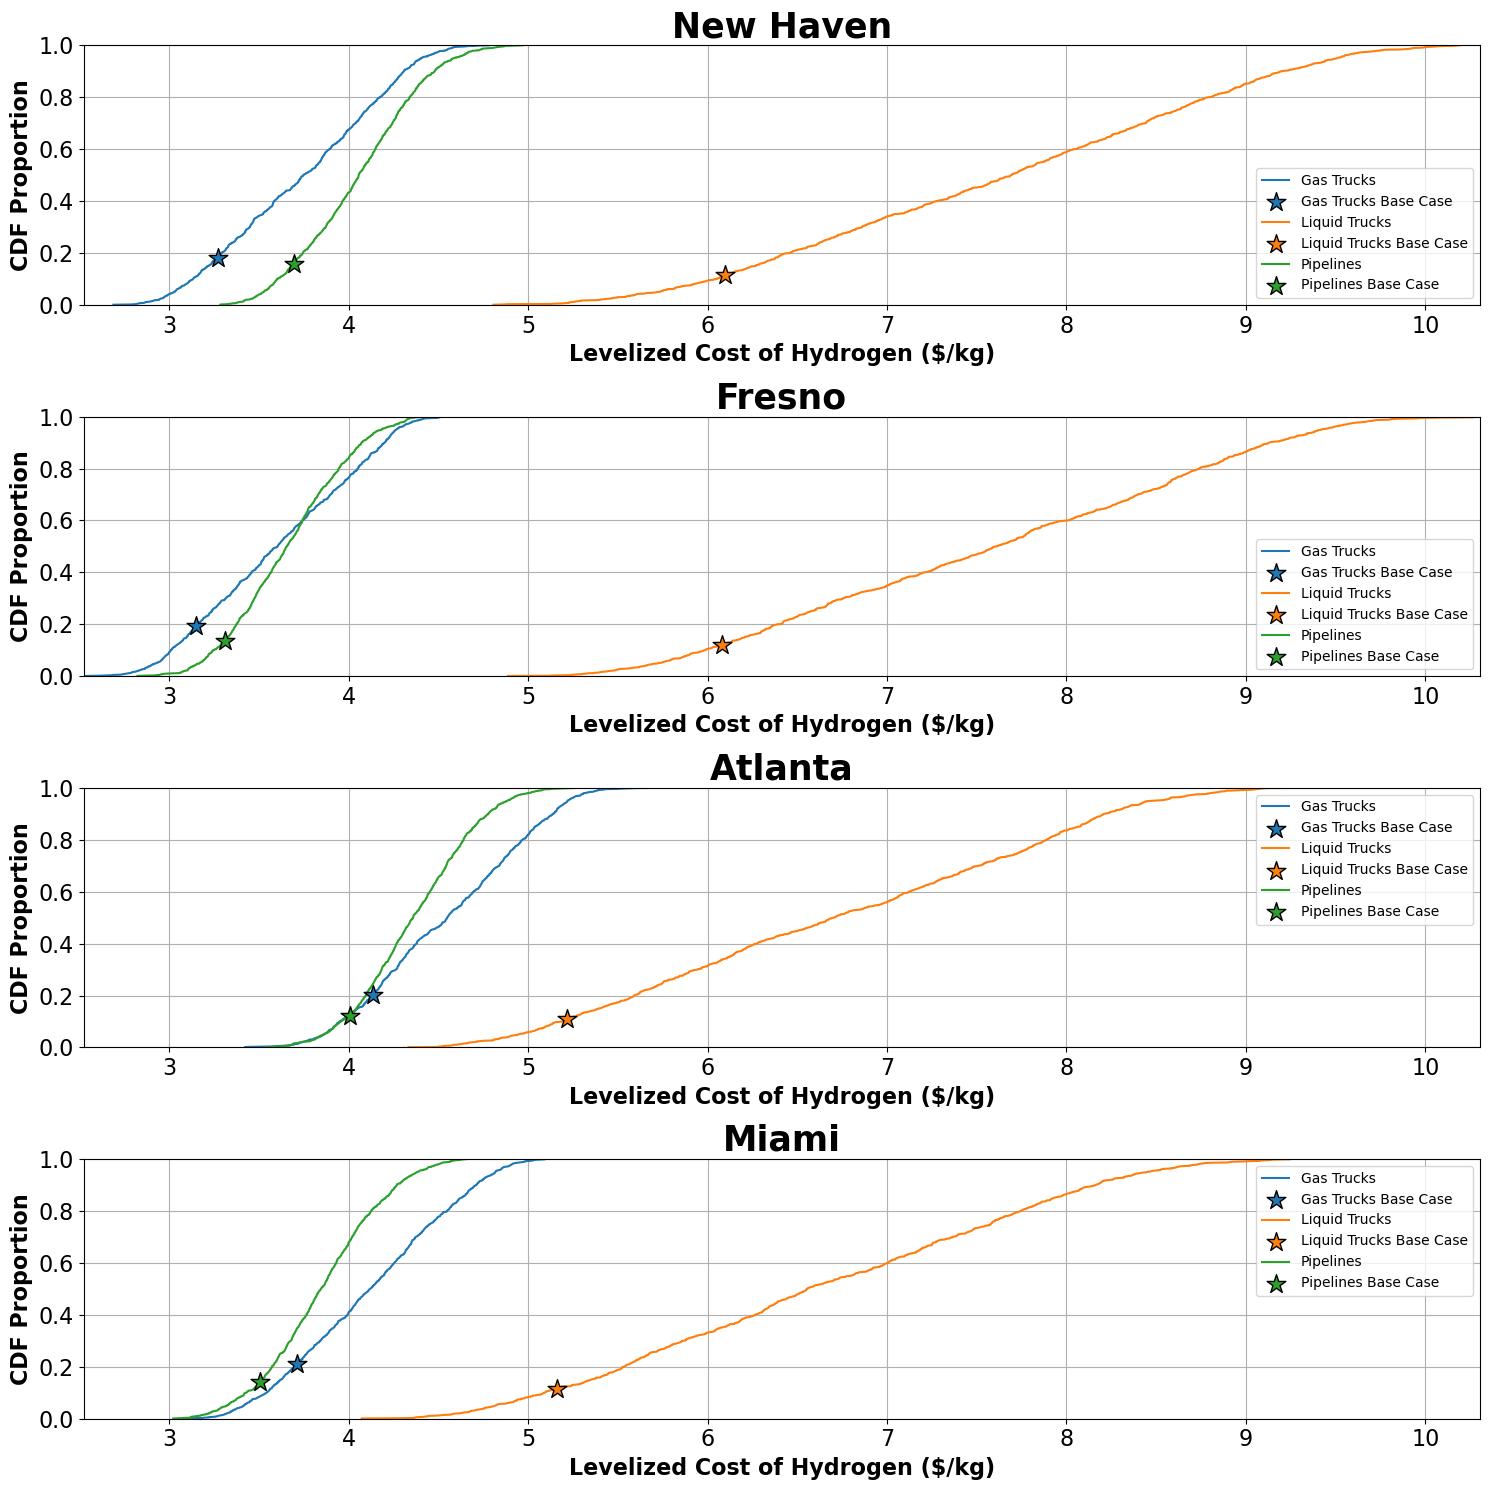

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to your CSV file
csv_file_path = 'Costs with Carbon Tax Data/Distribution Paper - High Demand w_ Carbon Tax.csv'  # Replace with your actual file path

# Reading the CSV file into a DataFrame, skipping the first row and removing unnamed columns
df = pd.read_csv(csv_file_path, skiprows=1)

# Dropping 'Unnamed' columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Assigning new column names
df.columns = [
    "New Haven Gas Trucks", "New Haven Liquid Trucks", "New Haven Pipelines",
    "Fresno Gas Trucks", "Fresno Liquid Trucks", "Fresno Pipelines",
    "Atlanta Gas Trucks", "Atlanta Liquid Trucks", "Atlanta Pipelines",
    "Miami Gas Trucks", "Miami Liquid Trucks", "Miami Pipelines",
]

# Base case values for each city and method
base_case_values = high_demand_values

# Determine x-axis limits
x_limits = (np.min(df.min()), np.max(df.max()))

# Function to plot CDF and add base case star marker with matching line color
def plot_cdf(data, ax, label, color, base_case=None):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Plot the CDF line
    ax.plot(sorted_data, cdf, label=label, color=color)
    
    # Plot the star at the base case value if it's provided
    if base_case is not None:
        # Find the closest point on the CDF for the base case value
        closest_index = np.abs(sorted_data - base_case).argmin()
        # Use the same color as the line for the star
        ax.scatter(
            sorted_data[closest_index], cdf[closest_index],
            color=color, marker='*', edgecolors='black',
            s=200, zorder=5, label=f'{label} Base Case'
        )

    ax.set_ylim(0, 1)

# Plotting CDFs
fig, axs = plt.subplots(4, 1, figsize=(15, 15))

cities = ["New Haven", "Fresno", "Atlanta", "Miami"]
methods = {
    "Gas Trucks": "#1f77b4",    # Blue
    "Liquid Trucks": "#ff7f0e",  # Orange
    "Pipelines": "#2ca02c"       # Green
}

for i, city in enumerate(cities):
    for method, color in methods.items():
        column_name = f"{city} {method}"
        axs[i].set_xlim(x_limits)  # Set consistent x-limits for each subplot
        if column_name in df.columns:
            base_case = base_case_values.get(column_name, None)
            plot_cdf(df[column_name], axs[i], method, color=color, base_case=base_case)

    axs[i].set_title(f'{city}', fontsize=25, fontweight='bold')
    axs[i].set_xlabel('Levelized Cost of Hydrogen ($/kg)', fontsize=16, fontweight='bold')
    axs[i].set_ylabel('CDF Proportion', fontsize=16, fontweight='bold')
    axs[i].legend()
    axs[i].grid(True)

    # Use tick_params for tick size
    axs[i].tick_params(axis='x', labelsize=16)
    axs[i].tick_params(axis='y', labelsize=16)

plt.tight_layout()
plt.savefig('High_Demand_CDF_w_CT')
plt.show()


In [ ]:
base_case